In [1]:
#!/usr/bin/env python3
import os, sys
import wget
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime as datetime
import cmocean.cm as cmo

In [2]:
REcoM1D_mesh = xr.open_dataset("/albedo/work/user/nmamnun/nuarctic/data/MESH/REcoM1D_mesh.nc")
mod_depths = REcoM1D_mesh.Z.values
mod_depths_bound = REcoM1D_mesh.zbar.values

In [3]:
REcoM1d_outputs = xr.open_dataset("/albedo/work/user/nmamnun/nuarctic/REcoM1D/freerun/REcoM1d_outputs_001.nc")

In [4]:
REcoM1d_outputs

<xarray.Dataset>
Dimensions:     (time: 530, level_node: 48, level_cell: 47)
Dimensions without coordinates: time, level_node, level_cell
Data variables: (12/48)
    day         (time) int32 ...
    year        (time) int32 ...
    level       (time) int32 ...
    z_node      (level_node) float32 ...
    z_cell      (level_cell) float32 ...
    dpCO2s      (time) float32 ...
    ...          ...
    Zoo2C       (level_cell, time) float32 ...
    idetz2n     (level_cell, time) float32 ...
    idetz2c     (level_cell, time) float32 ...
    idetz2si    (level_cell, time) float32 ...
    idetz2calc  (level_cell, time) float32 ...
    Kz          (level_cell, time) float32 ...

In [5]:
years = REcoM1d_outputs.year.values
days = REcoM1d_outputs.day.values 

In [6]:
# np.set_printoptions(threshold=np.inf)
# print(days)

In [7]:
mod_days = []
for i in range(len(years)):
    if years[i]==2019:
        day = days[i]
        mod_days.append(day)
        
    else: 
        day = days[i] + 365
        mod_days.append(day)
        
mod_days = np.array (mod_days)
# exclude the first 200 days of spin up 
mod_days = mod_days[200:]
# print(mod_days)

In [8]:
# Convert a day to date 

from datetime import datetime, timedelta

def day_to_date(day_number):
    """
    Convert a day number to a date, starting from January 1, 2019.
    
    Args:
    day_number (int): The day number starting from 1 on January 1, 2019.
    
    Returns:
    str: Date in 'YYYY-MM-DD' format.
    """
    start_date = datetime(2019, 1, 1)
    date = start_date + timedelta(days=day_number - 1)
    return date.strftime('%Y-%m-%d')

In [9]:
# print(day_to_date(106)) 
# print(day_to_date(518)) 
# print(day_to_date(635)) 

In [10]:
freerun_dir = "/albedo/work/user/nmamnun/nuarctic/REcoM1D/freerun"
n_files = 750
# List to store the PhyChl data from all files
freerun_DIN_data = []
freerun_DIC_data = []
freerun_DSi_data = []
freerun_NanoN_data = []
freerun_NanoC_data = []
freerun_NanoChl_data = []
freerun_DiaN_data = []
freerun_DiaC_data = []
freerun_DiaChl_data = []
freerun_DiaSi_data = []
freerun_NanoCaCO3_data = []
freerun_TotChl_data = []

# Loop through all the files
for i in range(1, n_files + 1):
    # Construct the file name
    file_name = freerun_dir + f"/REcoM1d_outputs_{i:03}.nc"
    
    # Open the file using xarray
    with xr.open_dataset(file_name) as ds:
        # Extract the variables and append to the list
        DIN_data = ds['DIN'].values
        freerun_DIN_data.append(DIN_data)

        DIC_data = ds['DIC'].values
        freerun_DIC_data.append(DIC_data)

        DSi_data = ds['DSi'].values
        freerun_DSi_data.append(DSi_data)

        NanoN_data = ds['PhyN'].values
        freerun_NanoN_data.append(NanoN_data)

        NanoC_data = ds['PhyC'].values
        freerun_NanoC_data.append(NanoC_data)

        NanoChl_data = ds['PhyChl'].values
        freerun_NanoChl_data.append(NanoChl_data)

        DiaN_data = ds['DiaN'].values
        freerun_DiaN_data.append(DiaN_data)

        DiaC_data = ds['DiaC'].values
        freerun_DiaC_data.append(DiaC_data)

        DiaChl_data = ds['DiaChl'].values
        freerun_DiaChl_data.append(DiaChl_data)

        DiaSi_data = ds['DiaSi'].values
        freerun_DiaSi_data.append(DiaSi_data)

        NanoCaCO3_data = ds['PhyCalc'].values
        freerun_NanoCaCO3_data.append(NanoCaCO3_data)
        
        # total chl is sum of NanoChl and DiaChl
        TotChl_data = NanoChl_data + DiaChl_data
        freerun_TotChl_data.append(TotChl_data)

freerun_DIN_data = np.array(freerun_DIN_data)
freerun_DIN_data = freerun_DIN_data[:, :,200:]

freerun_DIC_data = np.array(freerun_DIC_data)
freerun_DIC_data = freerun_DIC_data[:, :,200:]

freerun_DSi_data = np.array(freerun_DSi_data)
freerun_DSi_data = freerun_DSi_data[:, :,200:]

freerun_NanoN_data = np.array(freerun_NanoN_data)
freerun_NanoN_data = freerun_NanoN_data[:, :,200:]

freerun_NanoC_data = np.array(freerun_NanoC_data)
freerun_NanoC_data = freerun_NanoC_data[:, :,200:]

freerun_NanoChl_data = np.array(freerun_NanoChl_data)
freerun_NanoChl_data = freerun_NanoChl_data[:, :,200:]

freerun_DiaN_data = np.array(freerun_DiaN_data)
freerun_DiaN_data = freerun_DiaN_data[:, :,200:]

freerun_DiaC_data = np.array(freerun_DiaC_data)
freerun_DiaC_data = freerun_DiaC_data[:, :,200:]

freerun_DiaChl_data = np.array(freerun_DiaChl_data)
freerun_DiaChl_data = freerun_DiaChl_data[:, :,200:]

freerun_DiaSi_data = np.array(freerun_DiaSi_data)
freerun_DiaSi_data = freerun_DiaSi_data[:, :,200:]

freerun_NanoCaCO3_data = np.array(freerun_NanoCaCO3_data)
freerun_NanoCaCO3_data = freerun_NanoCaCO3_data[:, :,200:]

freerun_TotChl_data = np.array(freerun_TotChl_data)
freerun_TotChl_data = freerun_TotChl_data[:, :,200:]

## compute the ensemble mean

freerun_DIN_ens_mean = np.mean(freerun_DIN_data, axis=0)
freerun_DIC_ens_mean = np.mean(freerun_DIC_data, axis=0)
freerun_DSi_ens_mean = np.mean(freerun_DSi_data, axis=0)
freerun_NanoN_ens_mean = np.mean(freerun_NanoN_data, axis=0)
freerun_NanoC_ens_mean = np.mean(freerun_NanoC_data, axis=0)
freerun_NanoChl_ens_mean = np.mean(freerun_NanoChl_data, axis=0)
freerun_DiaN_ens_mean = np.mean(freerun_DiaN_data, axis=0)
freerun_DiaC_ens_mean = np.mean(freerun_DiaC_data, axis=0)
freerun_DiaChl_ens_mean = np.mean(freerun_DiaChl_data, axis=0)
freerun_DiaSi_ens_mean = np.mean(freerun_DiaSi_data, axis=0)
freerun_NanoCaCO3_ens_mean = np.mean(freerun_NanoCaCO3_data, axis=0)
freerun_TotChl_ens_mean = np.mean(freerun_TotChl_data, axis=0)

In [11]:
assimrun_dir = "/albedo/work/user/nmamnun/nuarctic/REcoM1D/assimrun"

n_files = 750
# List to store the PhyChl data from all files
assimrun_DIN_data = []
assimrun_DIC_data = []
assimrun_DSi_data = []
assimrun_NanoN_data = []
assimrun_NanoC_data = []
assimrun_NanoChl_data = []
assimrun_DiaN_data = []
assimrun_DiaC_data = []
assimrun_DiaChl_data = []
assimrun_DiaSi_data = []
assimrun_NanoCaCO3_data = []
assimrun_TotChl_data = []

# Loop through all the files
for i in range(1, n_files + 1):
    # Construct the file name
    file_name = assimrun_dir + f"/REcoM1d_outputs_{i:03}.nc"
    
    # Open the file using xarray
    with xr.open_dataset(file_name) as ds:
        # Extract the variables and append to the list
        DIN_data = ds['DIN'].values
        assimrun_DIN_data.append(DIN_data)

        DIC_data = ds['DIC'].values
        assimrun_DIC_data.append(DIC_data)

        DSi_data = ds['DSi'].values
        assimrun_DSi_data.append(DSi_data)

        NanoN_data = ds['PhyN'].values
        assimrun_NanoN_data.append(NanoN_data)

        NanoC_data = ds['PhyC'].values
        assimrun_NanoC_data.append(NanoC_data)

        NanoChl_data = ds['PhyChl'].values
        assimrun_NanoChl_data.append(NanoChl_data)

        DiaN_data = ds['DiaN'].values
        assimrun_DiaN_data.append(DiaN_data)

        DiaC_data = ds['DiaC'].values
        assimrun_DiaC_data.append(DiaC_data)

        DiaChl_data = ds['DiaChl'].values
        assimrun_DiaChl_data.append(DiaChl_data)

        DiaSi_data = ds['DiaSi'].values
        assimrun_DiaSi_data.append(DiaSi_data)

        NanoCaCO3_data = ds['PhyCalc'].values
        assimrun_NanoCaCO3_data.append(NanoCaCO3_data)
        
        # total chl is sum of NanoChl and DiaChl
        TotChl_data = NanoChl_data + DiaChl_data
        assimrun_TotChl_data.append(TotChl_data)

assimrun_DIN_data = np.array(assimrun_DIN_data)
assimrun_DIN_data = assimrun_DIN_data[:, :,200:]

assimrun_DIC_data = np.array(assimrun_DIC_data)
assimrun_DIC_data = assimrun_DIC_data[:, :,200:]

assimrun_DSi_data = np.array(assimrun_DSi_data)
assimrun_DSi_data = assimrun_DSi_data[:, :,200:]

assimrun_NanoN_data = np.array(assimrun_NanoN_data)
assimrun_NanoN_data = assimrun_NanoN_data[:, :,200:]

assimrun_NanoC_data = np.array(assimrun_NanoC_data)
assimrun_NanoC_data = assimrun_NanoC_data[:, :,200:]

assimrun_NanoChl_data = np.array(assimrun_NanoChl_data)
assimrun_NanoChl_data = assimrun_NanoChl_data[:, :,200:]

assimrun_DiaN_data = np.array(assimrun_DiaN_data)
assimrun_DiaN_data = assimrun_DiaN_data[:, :,200:]

assimrun_DiaC_data = np.array(assimrun_DiaC_data)
assimrun_DiaC_data = assimrun_DiaC_data[:, :,200:]

assimrun_DiaChl_data = np.array(assimrun_DiaChl_data)
assimrun_DiaChl_data = assimrun_DiaChl_data[:, :,200:]

assimrun_DiaSi_data = np.array(assimrun_DiaSi_data)
assimrun_DiaSi_data = assimrun_DiaSi_data[:, :,200:]

assimrun_NanoCaCO3_data = np.array(assimrun_NanoCaCO3_data)
assimrun_NanoCaCO3_data = assimrun_NanoCaCO3_data[:, :,200:]

assimrun_TotChl_data = np.array(assimrun_TotChl_data)
assimrun_TotChl_data = assimrun_TotChl_data[:, :,200:]


# ensemble mean
assimrun_DIN_ens_mean = np.mean(assimrun_DIN_data, axis=0)
assimrun_DIC_ens_mean = np.mean(assimrun_DIC_data, axis=0)
assimrun_DSi_ens_mean = np.mean(assimrun_DSi_data, axis=0)
assimrun_NanoN_ens_mean = np.mean(assimrun_NanoN_data, axis=0)
assimrun_NanoC_ens_mean = np.mean(assimrun_NanoC_data, axis=0)
assimrun_NanoChl_ens_mean = np.mean(assimrun_NanoChl_data, axis=0)
assimrun_DiaN_ens_mean = np.mean(assimrun_DiaN_data, axis=0)
assimrun_DiaC_ens_mean = np.mean(assimrun_DiaC_data, axis=0)
assimrun_DiaChl_ens_mean = np.mean(assimrun_DiaChl_data, axis=0)
assimrun_DiaSi_ens_mean = np.mean(assimrun_DiaSi_data, axis=0)
assimrun_NanoCaCO3_ens_mean = np.mean(assimrun_NanoCaCO3_data, axis=0)
assimrun_TotChl_ens_mean = np.mean(assimrun_TotChl_data, axis=0)

/tmp/ipykernel_3274208/4037261887.py:10: RuntimeWarning: divide by zero encountered in log10
  img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], np.log10(freerun_TotChl_ens_mean), vmin=-2.5, vmax=0.5) # ,


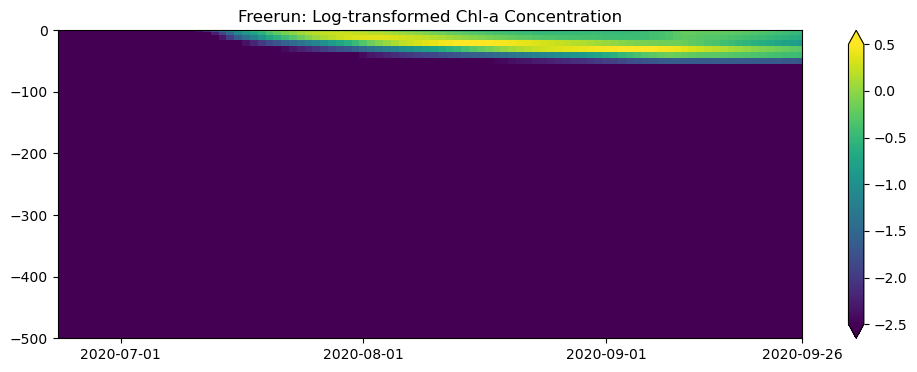

In [12]:
# xticks = [518, 548, 579, 610, 635]
xticks = [548, 579, 610, 635]
xtickslabel = []
for tick in xticks:
    label=day_to_date(tick)
    xtickslabel.append(label)

plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], np.log10(freerun_TotChl_ens_mean), vmin=-2.5, vmax=0.5) # ,  
plt.ylim([-500,0])
plt.xlim([540,635])
plt.xticks(xticks, xtickslabel)
plt.colorbar(img, extend='both')
plt.title("Freerun: Log-transformed Chl-a Concentration")
plt.show()

/tmp/ipykernel_3274208/1615816698.py:3: RuntimeWarning: divide by zero encountered in log10
  img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], np.log10(assimrun_TotChl_ens_mean), vmin=-2.5, vmax=0.5) # ,


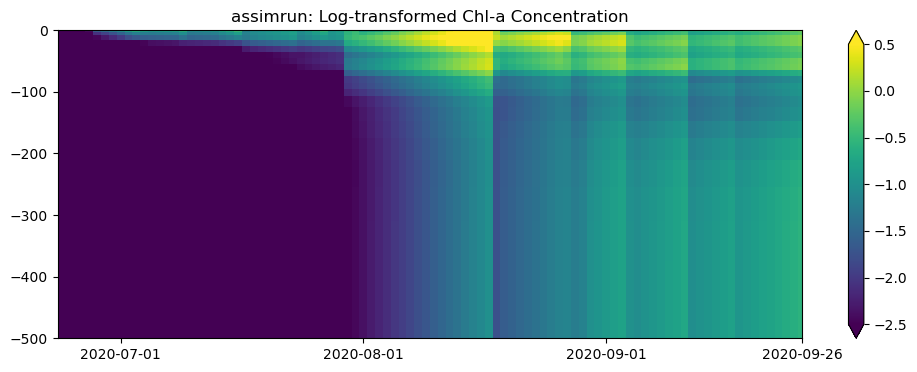

In [13]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], np.log10(assimrun_TotChl_ens_mean), vmin=-2.5, vmax=0.5) # ,  
plt.ylim([-500,0])
plt.xlim([540,635])
plt.xticks(xticks, xtickslabel)
plt.colorbar(img, extend='both')
plt.title("assimrun: Log-transformed Chl-a Concentration")
plt.show()

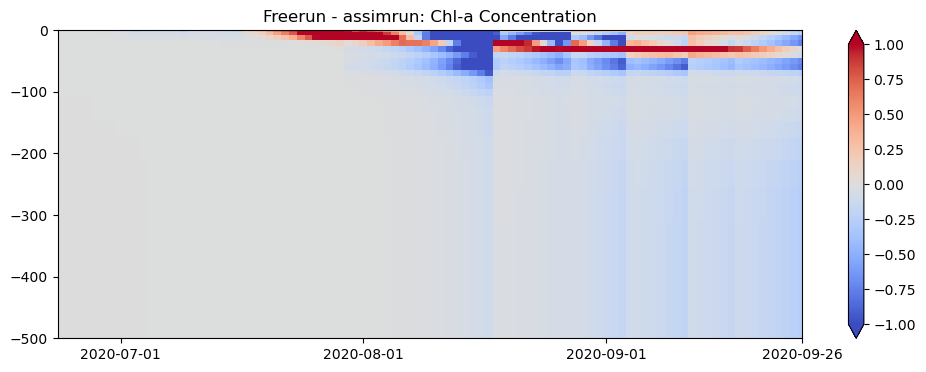

In [14]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[:-1], (freerun_TotChl_ens_mean - assimrun_TotChl_ens_mean), vmin=-1., vmax=1., cmap='coolwarm') # 
plt.ylim([-500,0])
plt.xlim([540,635])
plt.xticks(xticks, xtickslabel)
plt.colorbar(img, extend='both')
plt.title("Freerun - assimrun: Chl-a Concentration")
plt.show()

In [15]:
MOSAiC_Chla_ds = xr.open_dataset("../data/MOSAiC_Chla_forLaurent_20220905.nc")

In [16]:
MOSAiC_Chla = MOSAiC_Chla_ds['Chl_a'].values
MOSAiC_Chla = np.where(MOSAiC_Chla < 0, np.nan, MOSAiC_Chla)
MOSAiC_Chla_day = MOSAiC_Chla_ds['step'].values//48 + 105
MOSAiC_Chla_depth = MOSAiC_Chla_ds['depth'].values

In [17]:
MOSAiC_Chla_flat = MOSAiC_Chla.flatten()
MOSAiC_Chla_day_mesh,  MOSAiC_Chla_depth_mesh = np.meshgrid(MOSAiC_Chla_day, MOSAiC_Chla_depth)
MOSAiC_Chla_day_flat = MOSAiC_Chla_day_mesh.flatten()
MOSAiC_Chla_depth_flat = MOSAiC_Chla_depth_mesh.flatten()

/tmp/ipykernel_3274208/2476381239.py:5: RuntimeWarning: divide by zero encountered in log10
  img1 = plt.pcolormesh(mod_days, mod_depths_bound[:-1], np.log10(freerun_TotChl_ens_mean), vmin=-4.5, vmax=0.5)
/tmp/ipykernel_3274208/2476381239.py:6: RuntimeWarning: divide by zero encountered in log10
  sc1 = plt.scatter(MOSAiC_Chla_day_flat, MOSAiC_Chla_depth_flat, c=np.log10(MOSAiC_Chla_flat), cmap='viridis', marker='o')
/tmp/ipykernel_3274208/2476381239.py:16: RuntimeWarning: divide by zero encountered in log10
  img2 = plt.pcolormesh(mod_days, mod_depths_bound[:-1], np.log10(assimrun_TotChl_ens_mean), vmin=-4.5, vmax=0.5)
/tmp/ipykernel_3274208/2476381239.py:17: RuntimeWarning: divide by zero encountered in log10
  sc2 = plt.scatter(MOSAiC_Chla_day_flat, MOSAiC_Chla_depth_flat, c=np.log10(MOSAiC_Chla_flat), cmap='viridis', marker='o')


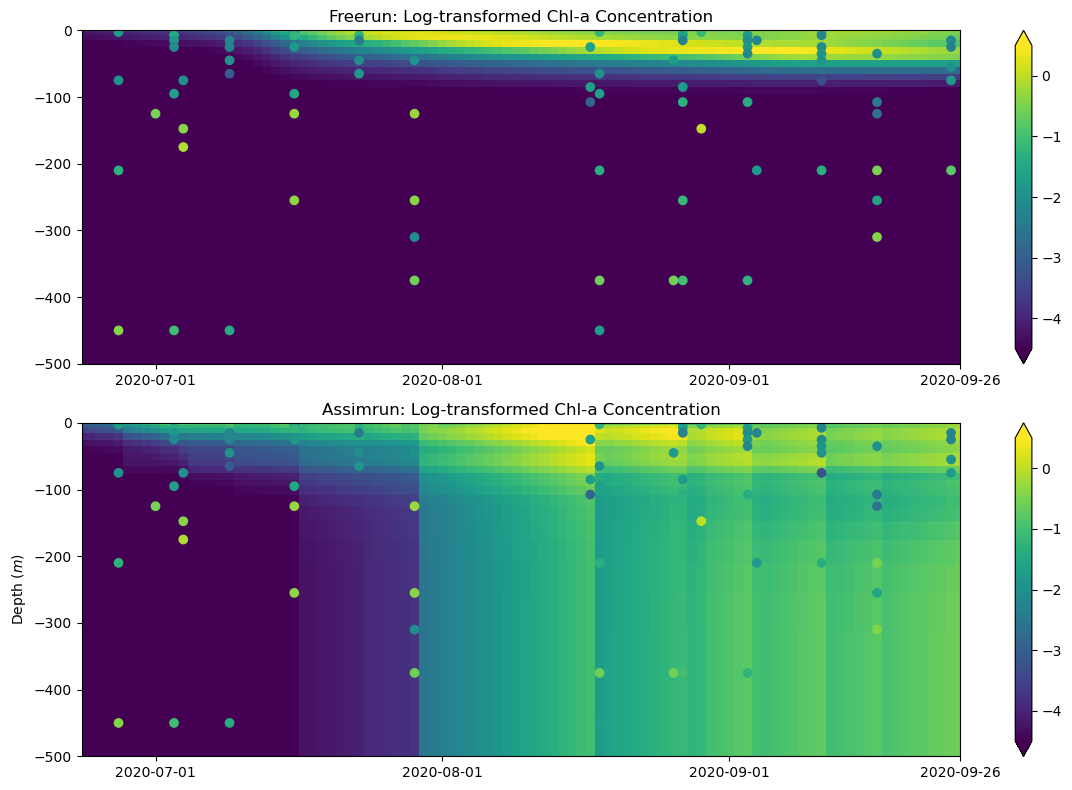

In [18]:
plt.figure(figsize=(12, 8))

# First plot (Freerun)
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
img1 = plt.pcolormesh(mod_days, mod_depths_bound[:-1], np.log10(freerun_TotChl_ens_mean), vmin=-4.5, vmax=0.5)
sc1 = plt.scatter(MOSAiC_Chla_day_flat, MOSAiC_Chla_depth_flat, c=np.log10(MOSAiC_Chla_flat), cmap='viridis', marker='o')
plt.clim(-4.5, 0.5)
plt.ylim([-500, 0])
plt.xlim([540, 635])
plt.xticks(xticks, xtickslabel)
plt.colorbar(img1, extend='both')
plt.title("Freerun: Log-transformed Chl-a Concentration")

# Second plot (Assimrun)
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
img2 = plt.pcolormesh(mod_days, mod_depths_bound[:-1], np.log10(assimrun_TotChl_ens_mean), vmin=-4.5, vmax=0.5)
sc2 = plt.scatter(MOSAiC_Chla_day_flat, MOSAiC_Chla_depth_flat, c=np.log10(MOSAiC_Chla_flat), cmap='viridis', marker='o')
plt.clim(-4.5, 0.5)
plt.ylim([-500, 0])
plt.xlim([540, 635])
plt.xticks(xticks, xtickslabel)
plt.colorbar(img2, extend='both')
plt.ylabel(r"Depth ($m$)")
plt.title("Assimrun: Log-transformed Chl-a Concentration")

plt.tight_layout()
plt.show()

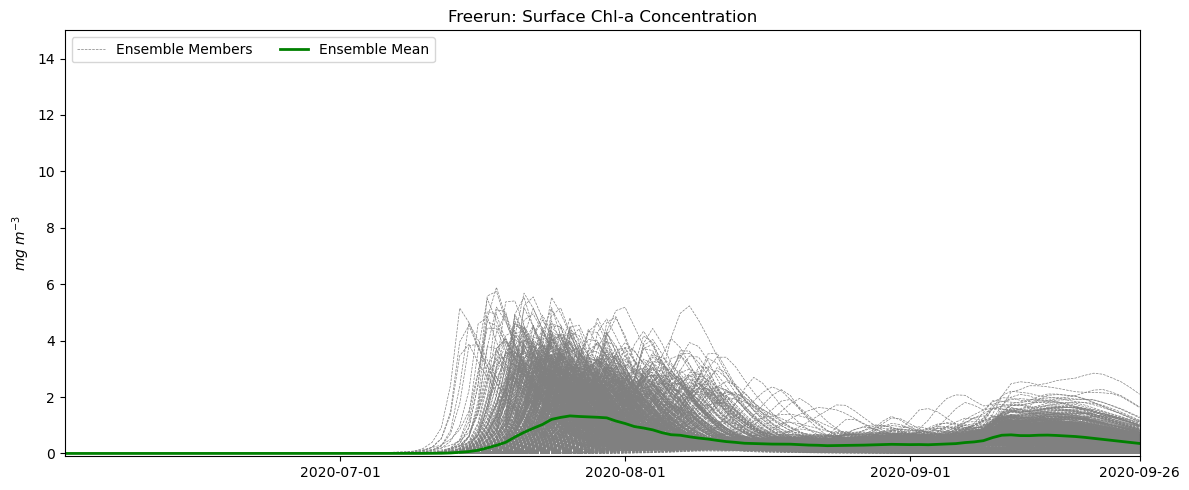

In [19]:
plt.figure(figsize=(12, 5))

# Plot each ensemble member
for i in range(freerun_TotChl_data.shape[0]):
    plt.plot(mod_days, freerun_TotChl_data[i, 0, :], linestyle='--', linewidth=0.5, color='gray', label=f'Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = freerun_TotChl_ens_mean[0]
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylim([-0.1,15])
plt.ylabel(r"$mg\;m^{-3}$")

plt.title("Freerun: Surface Chl-a Concentration")
# plt.xlabel("Date")

plt.legend(loc="upper left", ncol=2) 
plt.tight_layout()
plt.show()

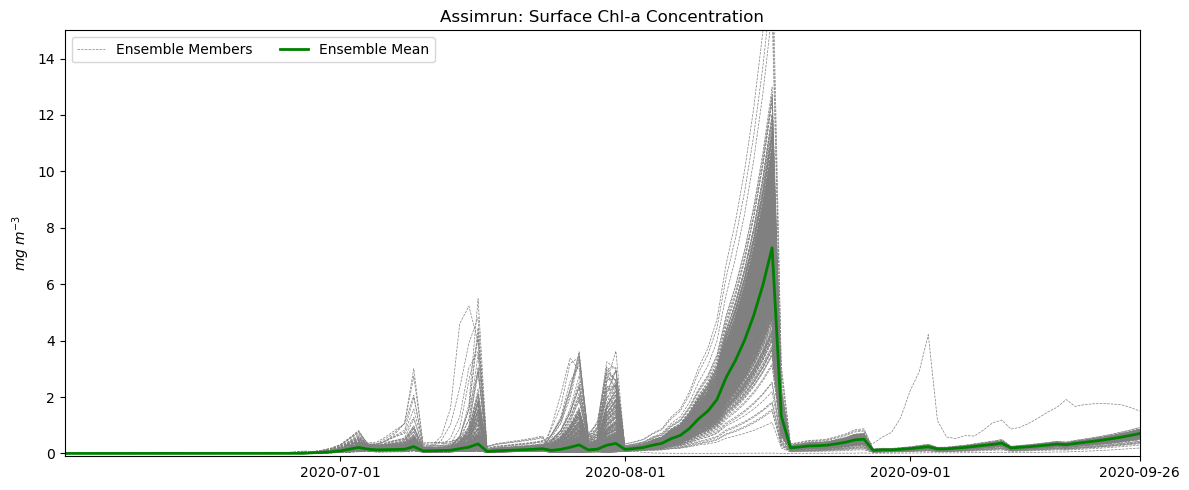

In [20]:
plt.figure(figsize=(12, 5))

# Plot each ensemble member
for i in range(assimrun_TotChl_data.shape[0]):
    plt.plot(mod_days, assimrun_TotChl_data[i, 0, :], linestyle='--', linewidth=0.5, color='gray', label=f'Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = assimrun_TotChl_ens_mean[0]
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylim([-0.1,15])
plt.ylabel(r"$mg\;m^{-3}$")

plt.title("Assimrun: Surface Chl-a Concentration")
# plt.xlabel("Date")

plt.legend(loc="upper left", ncol=2) 
plt.tight_layout()
plt.show()

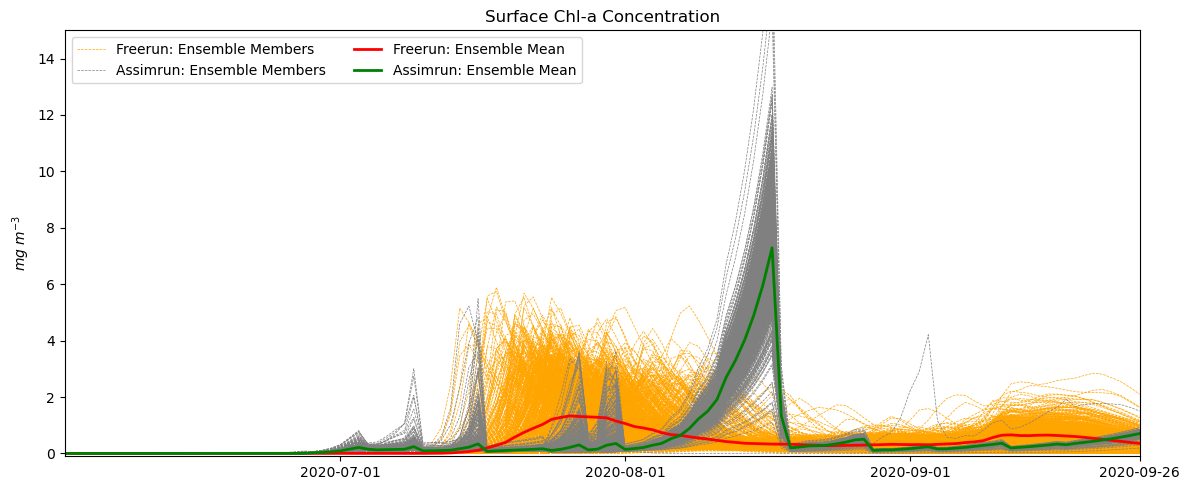

In [21]:
plt.figure(figsize=(12, 5))

# Plot each ensemble member
for i in range(freerun_TotChl_data.shape[0]):
    plt.plot(mod_days, freerun_TotChl_data[i, 0, :], linestyle='--', linewidth=0.5, color='orange', label=f'Freerun: Ensemble Members' if i < 1 else None)
    
for i in range(assimrun_TotChl_data.shape[0]):
    plt.plot(mod_days, assimrun_TotChl_data[i, 0, :], linestyle='--', linewidth=0.5, color='gray', label=f'Assimrun: Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = freerun_TotChl_ens_mean[0]
plt.plot(mod_days, mean_values, color='red', linewidth=2, label='Freerun: Ensemble Mean')

mean_values = assimrun_TotChl_ens_mean[0]
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Assimrun: Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylim([-0.1,15])
plt.ylabel(r"$mg\;m^{-3}$")

plt.title("Surface Chl-a Concentration")
# plt.xlabel("Date")

plt.legend(loc="upper left", ncol=2) 
plt.tight_layout()
plt.show()

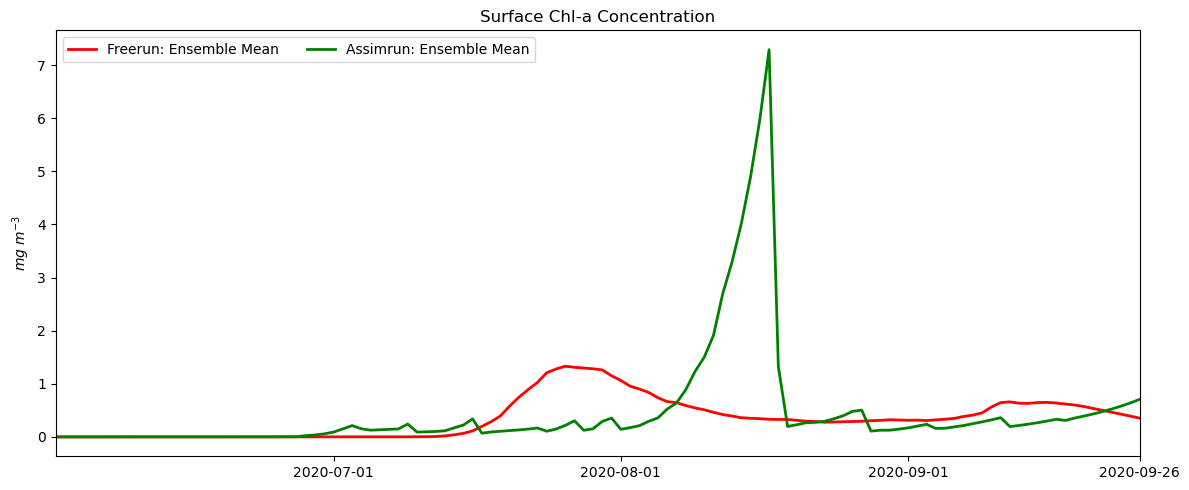

In [22]:
plt.figure(figsize=(12, 5))

# Plot the mean
mean_values = freerun_TotChl_ens_mean[0]
plt.plot(mod_days, mean_values, color='red', linewidth=2, label='Freerun: Ensemble Mean')

mean_values = assimrun_TotChl_ens_mean[0]
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Assimrun: Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylabel(r"$mg\;m^{-3}$")

plt.title("Surface Chl-a Concentration")
# plt.xlabel("Date")

plt.legend(loc="upper left", ncol=2) 
plt.tight_layout()
plt.show()

In [23]:
freerun_TotChl_mean_surf_100m = freerun_TotChl_data[:, 0:12, :].mean(axis=1)
print(freerun_TotChl_mean_surf_100m.shape)

(750, 330)


In [24]:
assimrun_TotChl_mean_surf_100m = assimrun_TotChl_data[:, 0:12, :].mean(axis=1)
print(assimrun_TotChl_mean_surf_100m.shape)

(750, 330)


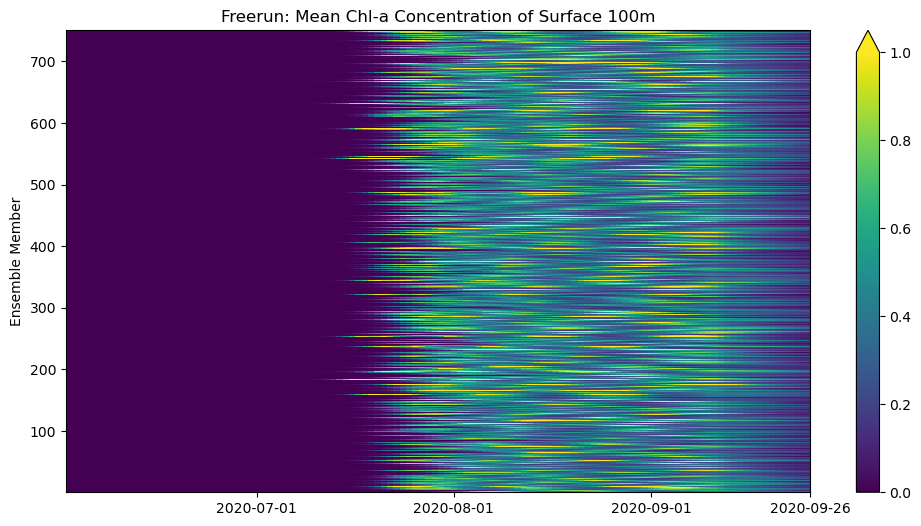

In [25]:
plt.rcParams["figure.figsize"] = (12,6) 

img = plt.pcolormesh(mod_days, range(1, n_files + 1), freerun_TotChl_mean_surf_100m, vmin=0, vmax=1., ) # ,  
plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)
plt.ylabel("Ensemble Member")
plt.colorbar(img, extend='max')
plt.title("Freerun: Mean Chl-a Concentration of Surface 100m")
plt.show()

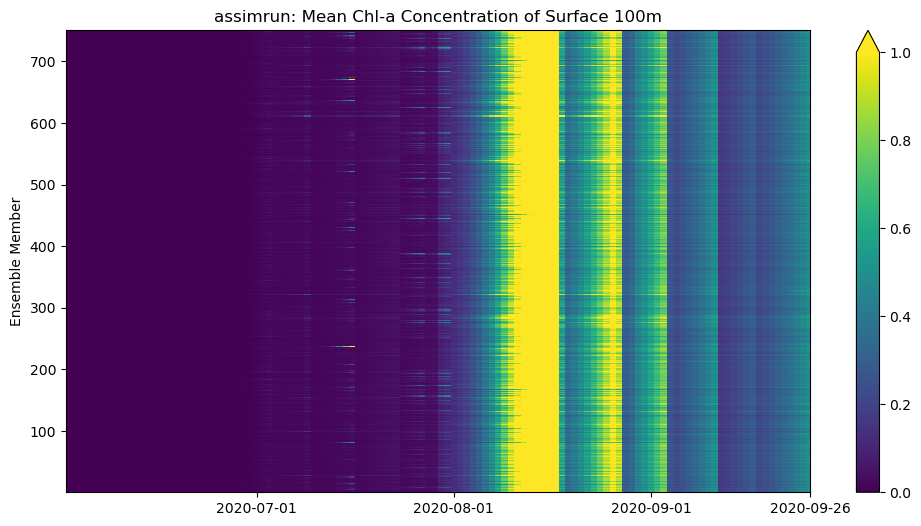

In [26]:
plt.rcParams["figure.figsize"] = (12,6) 

img = plt.pcolormesh(mod_days, range(1, n_files + 1), assimrun_TotChl_mean_surf_100m, vmin=0, vmax=1.) # ,  
plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)
plt.ylabel("Ensemble Member")
plt.colorbar(img, extend='max')
plt.title("assimrun: Mean Chl-a Concentration of Surface 100m")
plt.show()

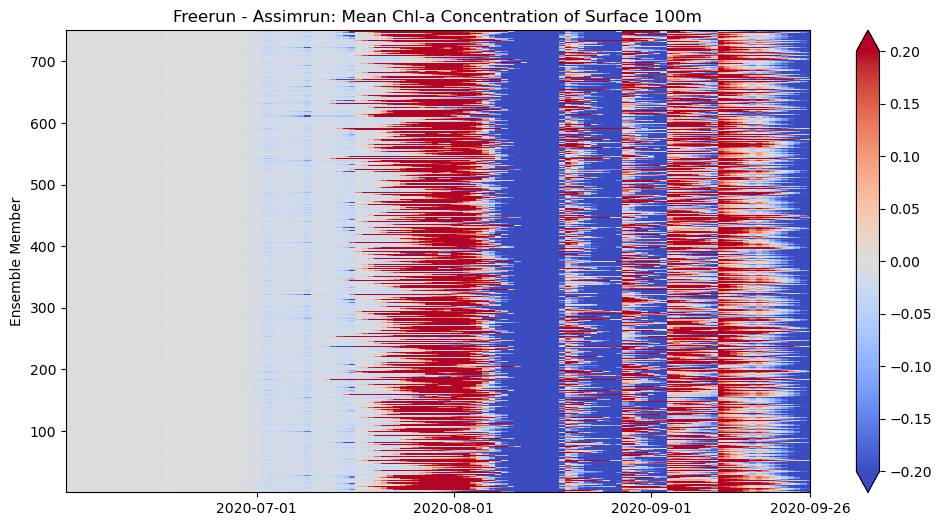

In [27]:
plt.rcParams["figure.figsize"] = (12,6) 

img = plt.pcolormesh(mod_days, range(1, n_files + 1), freerun_TotChl_mean_surf_100m - assimrun_TotChl_mean_surf_100m,  vmin=-0.2, vmax=0.2, cmap='coolwarm') # , 
plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)
plt.ylabel("Ensemble Member")
plt.colorbar(img, extend='both')
plt.title("Freerun - Assimrun: Mean Chl-a Concentration of Surface 100m")
plt.show()

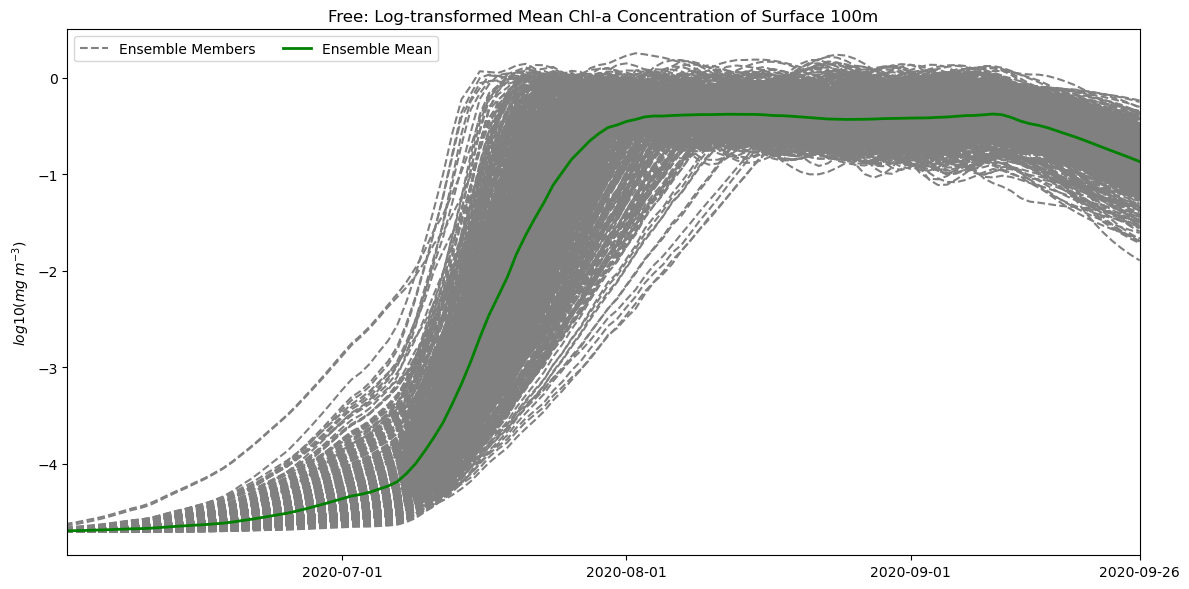

In [28]:
freerun_TotChl_mean_surf_100m_log10 = np.log10(freerun_TotChl_mean_surf_100m)

plt.figure(figsize=(12, 6))

# Plot each ensemble member
for i in range(freerun_TotChl_mean_surf_100m_log10.shape[0]):
    plt.plot(mod_days, freerun_TotChl_mean_surf_100m_log10[i], linestyle='--', color='gray', label=f'Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = np.mean(freerun_TotChl_mean_surf_100m_log10, axis=0)
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.title("Free: Log-transformed Mean Chl-a Concentration of Surface 100m")

plt.ylabel(r"$log10(mg\;m^{-3})$")
plt.legend(loc="upper left", ncol=2) 
plt.tight_layout()
plt.show()

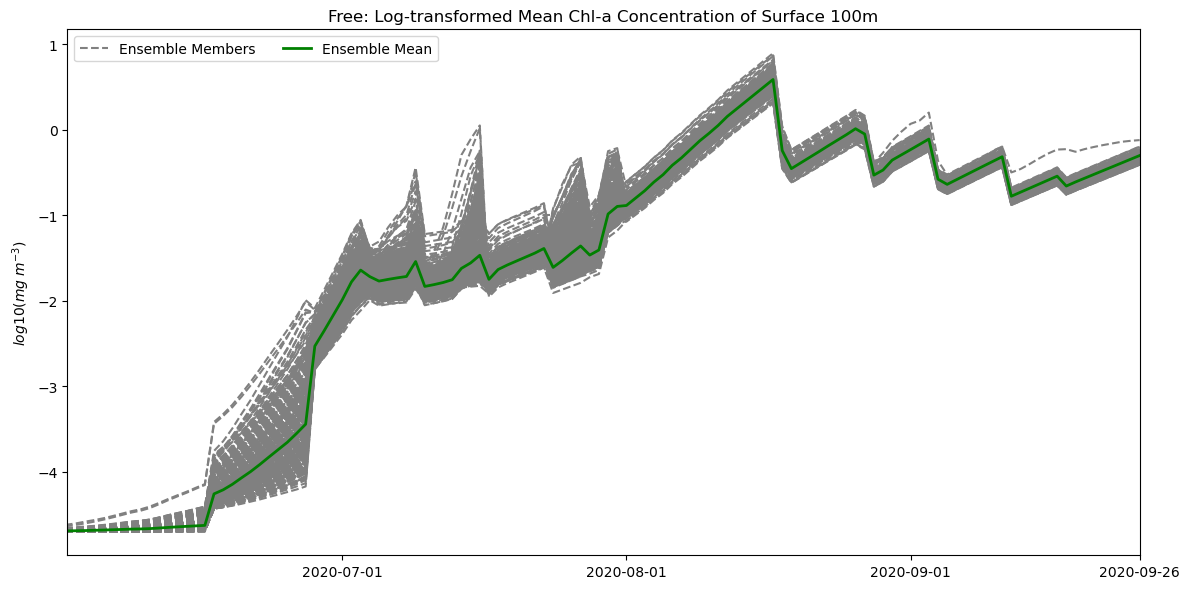

In [29]:
assimrun_TotChl_mean_surf_100m_log10 = np.log10(assimrun_TotChl_mean_surf_100m)

plt.figure(figsize=(12, 6))

# Plot each ensemble member
for i in range(assimrun_TotChl_mean_surf_100m_log10.shape[0]):
    plt.plot(mod_days, assimrun_TotChl_mean_surf_100m_log10[i], linestyle='--', color='gray', label=f'Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = np.mean(assimrun_TotChl_mean_surf_100m_log10, axis=0)
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.title("Free: Log-transformed Mean Chl-a Concentration of Surface 100m")

plt.ylabel(r"$log10(mg\;m^{-3})$")
plt.legend(loc="upper left", ncol=2) 
plt.tight_layout()
plt.show()

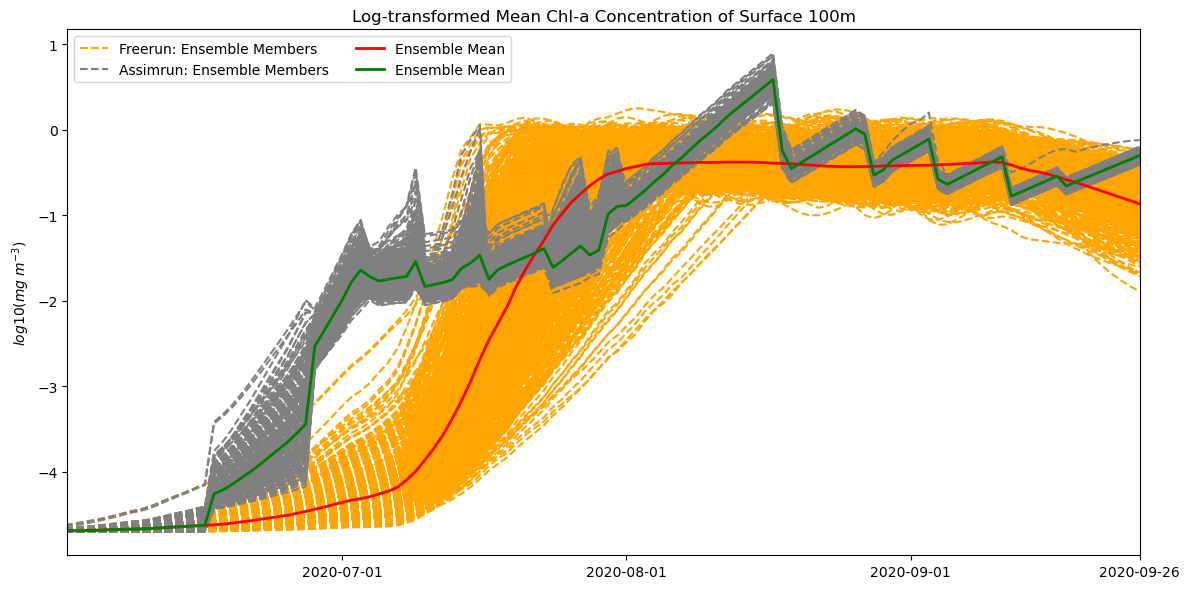

In [30]:
assimrun_TotChl_mean_surf_100m_log10 = np.log10(assimrun_TotChl_mean_surf_100m)

plt.figure(figsize=(12, 6))

# Plot each ensemble member

for i in range(freerun_TotChl_mean_surf_100m_log10.shape[0]):
    plt.plot(mod_days, freerun_TotChl_mean_surf_100m_log10[i], linestyle='--', color='orange', label=f'Freerun: Ensemble Members' if i < 1 else None)

for i in range(assimrun_TotChl_mean_surf_100m_log10.shape[0]):
    plt.plot(mod_days, assimrun_TotChl_mean_surf_100m_log10[i], linestyle='--', color='gray', label=f'Assimrun: Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = np.mean(freerun_TotChl_mean_surf_100m_log10, axis=0)
plt.plot(mod_days, mean_values, color='red', linewidth=2, label='Ensemble Mean')

mean_values = np.mean(assimrun_TotChl_mean_surf_100m_log10, axis=0)
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.title("Log-transformed Mean Chl-a Concentration of Surface 100m")

plt.ylabel(r"$log10(mg\;m^{-3})$")
plt.legend(loc="upper left", ncol=2) 
plt.tight_layout()
plt.show()

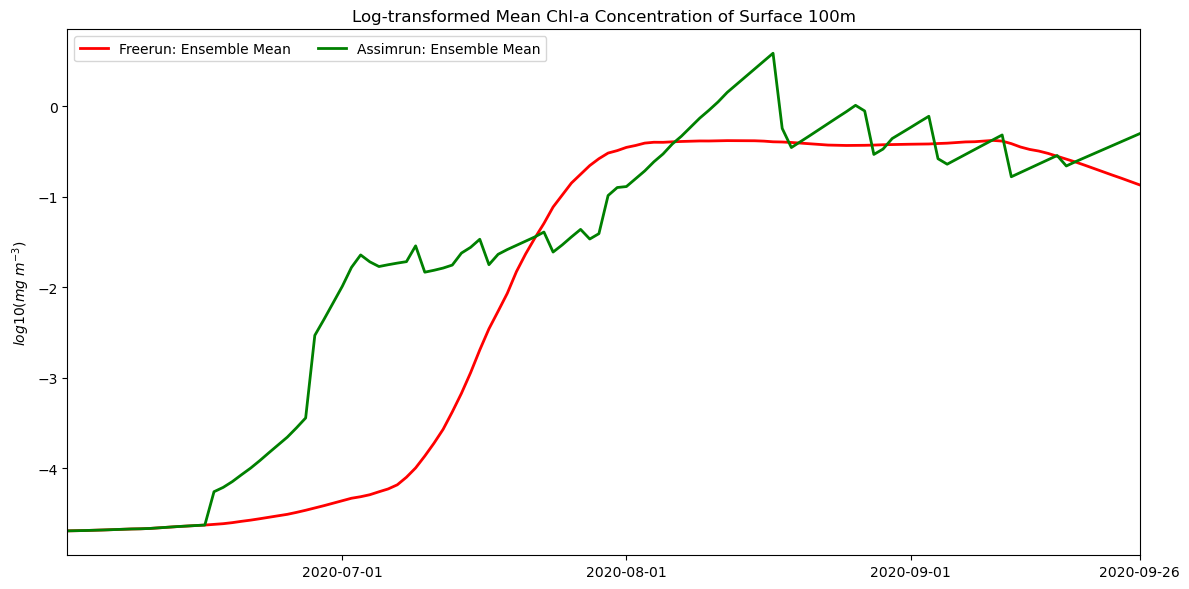

In [31]:
assimrun_TotChl_mean_surf_100m_log10 = np.log10(assimrun_TotChl_mean_surf_100m)

plt.figure(figsize=(12, 6))

# Plot the mean
mean_values = np.mean(freerun_TotChl_mean_surf_100m_log10, axis=0)
plt.plot(mod_days, mean_values, color='red', linewidth=2, label='Freerun: Ensemble Mean')

mean_values = np.mean(assimrun_TotChl_mean_surf_100m_log10, axis=0)
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Assimrun: Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.title("Log-transformed Mean Chl-a Concentration of Surface 100m")

plt.ylabel(r"$log10(mg\;m^{-3})$")
plt.legend(loc="upper left", ncol=2) 
plt.tight_layout()
plt.show()

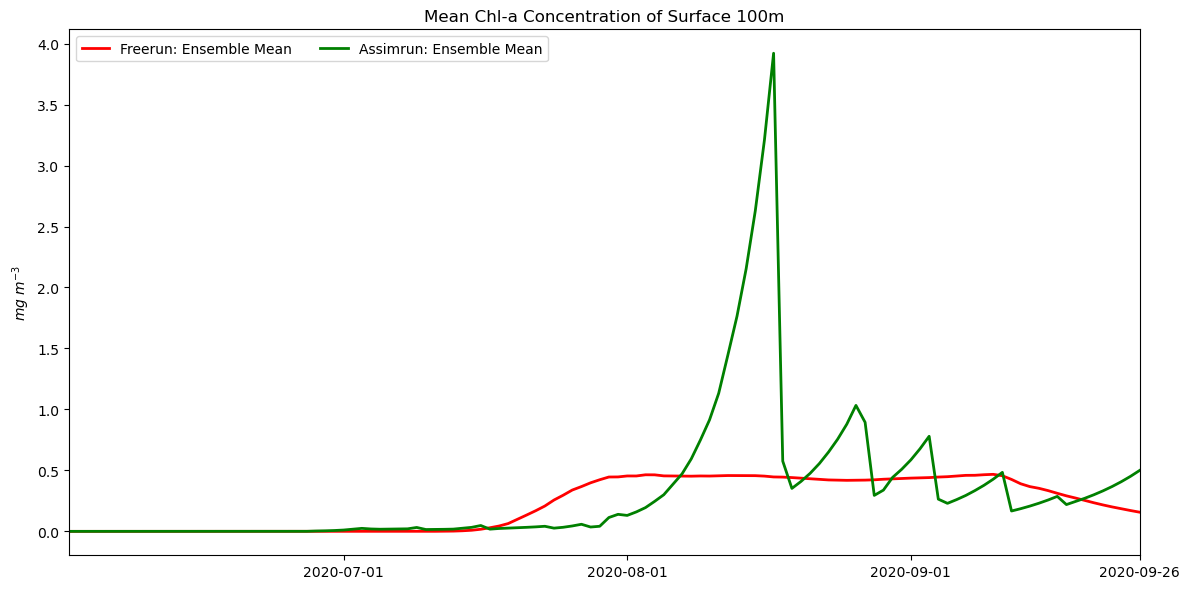

In [32]:
assimrun_TotChl_mean_surf_100m_log10 = np.log10(assimrun_TotChl_mean_surf_100m)

plt.figure(figsize=(12, 6))

# Plot the mean
mean_values = np.mean(freerun_TotChl_mean_surf_100m, axis=0)
plt.plot(mod_days, mean_values, color='red', linewidth=2, label='Freerun: Ensemble Mean')

mean_values = np.mean(assimrun_TotChl_mean_surf_100m, axis=0)
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Assimrun: Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.title("Mean Chl-a Concentration of Surface 100m")

plt.ylabel(r"$mg\;m^{-3}$")
plt.legend(loc="upper left", ncol=2) 
plt.tight_layout()
plt.show()

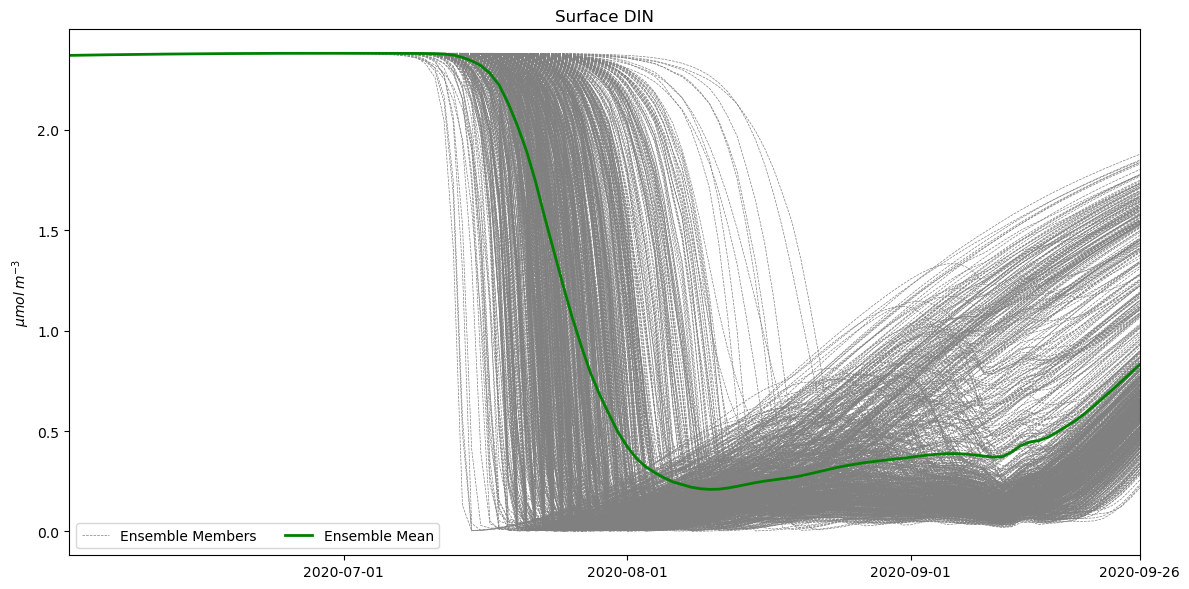

In [33]:
plt.figure(figsize=(12, 6))

# Plot each ensemble member
for i in range(freerun_DIN_data.shape[0]):
    plt.plot(mod_days, freerun_DIN_data[i, 0, :], linestyle='--', linewidth=0.5, color='gray', label=f'Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = freerun_DIN_ens_mean[0]
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylabel(r"$\mu mol\;m^{-3}$")
plt.legend(loc="lower left", ncol=2)  
plt.title("Surface DIN")

plt.tight_layout()
plt.show()

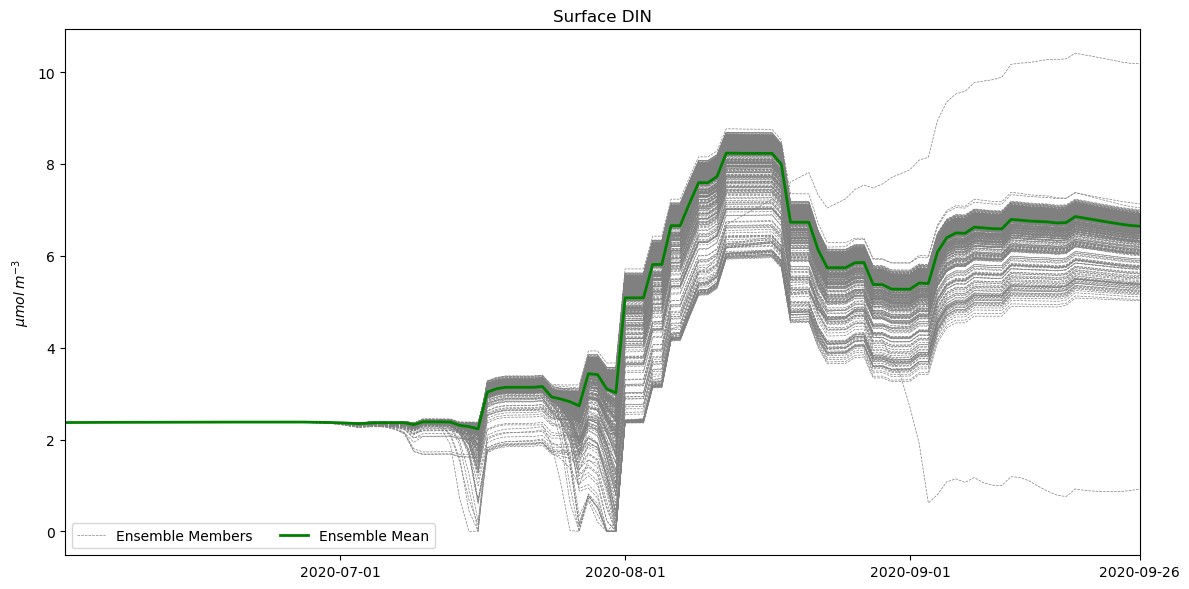

In [34]:
plt.figure(figsize=(12, 6))

# Plot each ensemble member
for i in range(assimrun_DIN_data.shape[0]):
    plt.plot(mod_days, assimrun_DIN_data[i, 0, :], linestyle='--', linewidth=0.5, color='gray', label=f'Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = assimrun_DIN_ens_mean[0]
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylabel(r"$\mu mol\;m^{-3}$")
plt.legend(loc="lower left", ncol=2)  
plt.title("Surface DIN")

plt.tight_layout()
plt.show()

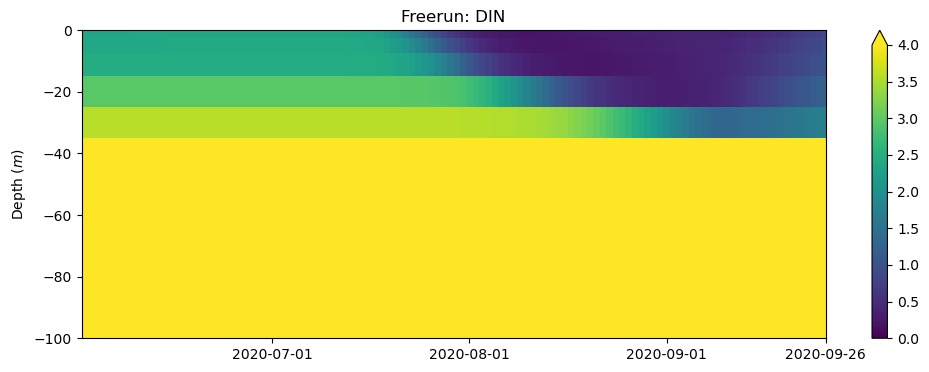

In [35]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], freerun_DIN_ens_mean, vmin=0, vmax=4) # 

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylim([-100,0])
plt.ylabel(r"Depth ($m$)")
plt.colorbar(img, extend='max')
plt.title("Freerun: DIN")
plt.show()

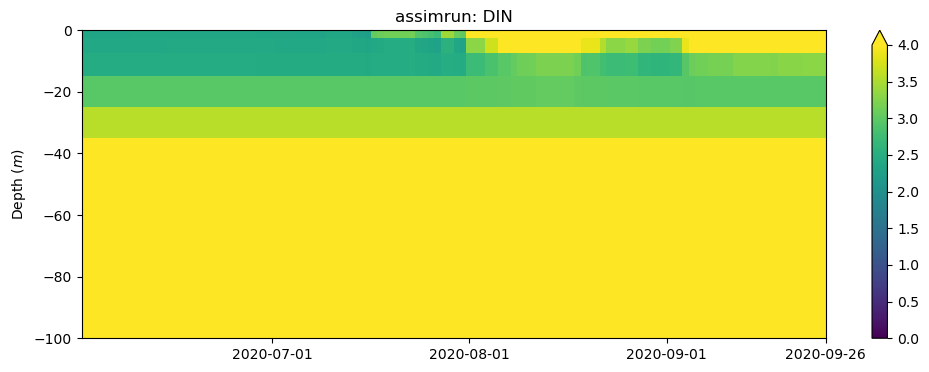

In [36]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], assimrun_DIN_ens_mean, vmin=0, vmax=4) # 

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylim([-100,0])
plt.ylabel(r"Depth ($m$)")
plt.colorbar(img, extend='max')
plt.title("assimrun: DIN")
plt.show()

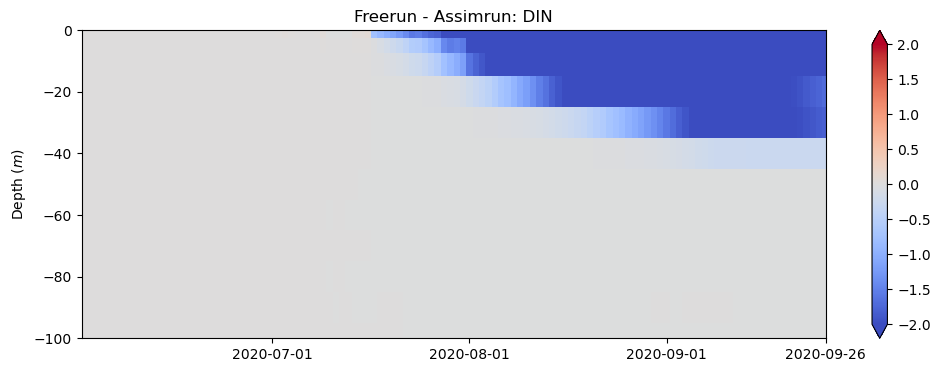

In [37]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], freerun_DIN_ens_mean - assimrun_DIN_ens_mean, vmin=-2., vmax=2., cmap='coolwarm') # 

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylim([-100,0])
plt.ylabel(r"Depth ($m$)")
plt.colorbar(img, extend='both')
plt.title("Freerun - Assimrun: DIN")
plt.show()

In [38]:
NUTRIENTS_ds = xr.open_dataset('../data/PS122_NUTRIENTS.nc')
NUTRIENTS_step = NUTRIENTS_ds['step'].values
NUTRIENTS_day = NUTRIENTS_step//48 + 105
NUTRIENTS_depth = NUTRIENTS_ds['depth'].values

din_obse_values = NUTRIENTS_ds['DIN'].values
din_obse_values = np.where(din_obse_values < 0, np.nan, din_obse_values)
dsi_obs_values = NUTRIENTS_ds['DSi'].values
dsi_obs_values = np.where(dsi_obs_values < 0, np.nan, dsi_obs_values)

# Create a meshgrid for the scatter plot
NUTRIENTS_day_mesh, NUTRIENTS_depth_mesh = np.meshgrid(NUTRIENTS_day, NUTRIENTS_depth)

# Flatten the arrays for scatter plotting
NUTRIENTS_day_flat = NUTRIENTS_day_mesh.flatten()
NUTRIENTS_depth_flat = NUTRIENTS_depth_mesh.flatten()
din_obse_flat = din_obse_values.flatten()
dsi_obs_flat = dsi_obs_values.flatten()

NUTRIENTS_ds.close()

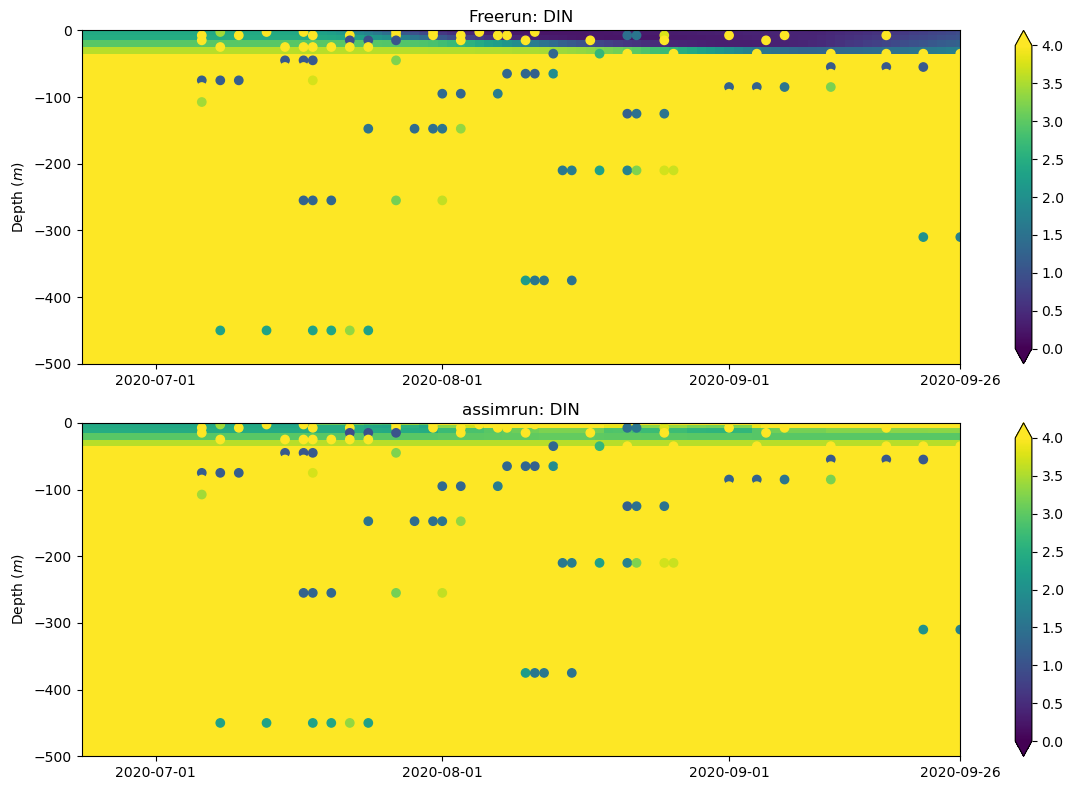

In [39]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
img1 = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], freerun_DIN_ens_mean, vmin=0, vmax=4) 
sc1 = plt.scatter(NUTRIENTS_day_flat, NUTRIENTS_depth_flat, c=din_obse_flat, cmap='viridis', marker='o')
plt.clim(0, 4)
plt.ylim([-500, 0])
plt.xlim([540, 635])
plt.xticks(xticks, xtickslabel)
plt.colorbar(img1, extend='both')
plt.ylabel(r"Depth ($m$)")
plt.title("Freerun: DIN")

plt.subplot(2, 1, 2)  
img2 = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], assimrun_DIN_ens_mean, vmin=0, vmax=4)
sc2 = plt.scatter(NUTRIENTS_day_flat, NUTRIENTS_depth_flat, c=din_obse_flat, cmap='viridis', marker='o')
plt.clim(0, 4)
plt.ylim([-500, 0])
plt.xlim([540, 635])
plt.xticks(xticks, xtickslabel)
plt.colorbar(img2, extend='both')
plt.ylabel(r"Depth ($m$)")
plt.title("assimrun: DIN")

plt.tight_layout()
plt.show()

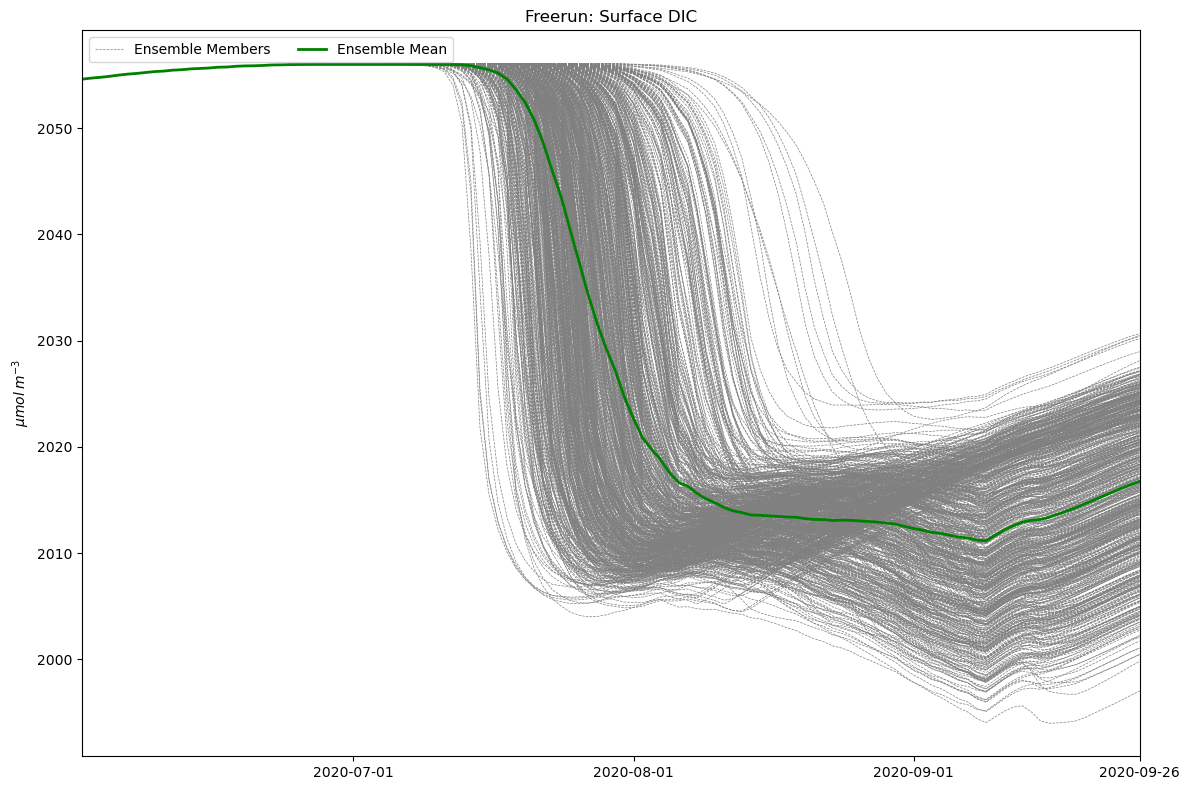

In [40]:
plt.figure(figsize=(12, 8))

# Plot each ensemble member
for i in range(freerun_DIC_data.shape[0]):
    plt.plot(mod_days, freerun_DIC_data[i, 0, :], linestyle='--', linewidth=0.5, color='gray', label=f'Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = freerun_DIC_ens_mean[0]
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylabel(r"$\mu mol\;m^{-3}$")
plt.legend(loc="upper left", ncol=2) 

plt.title("Freerun: Surface DIC")
plt.tight_layout()
plt.show()

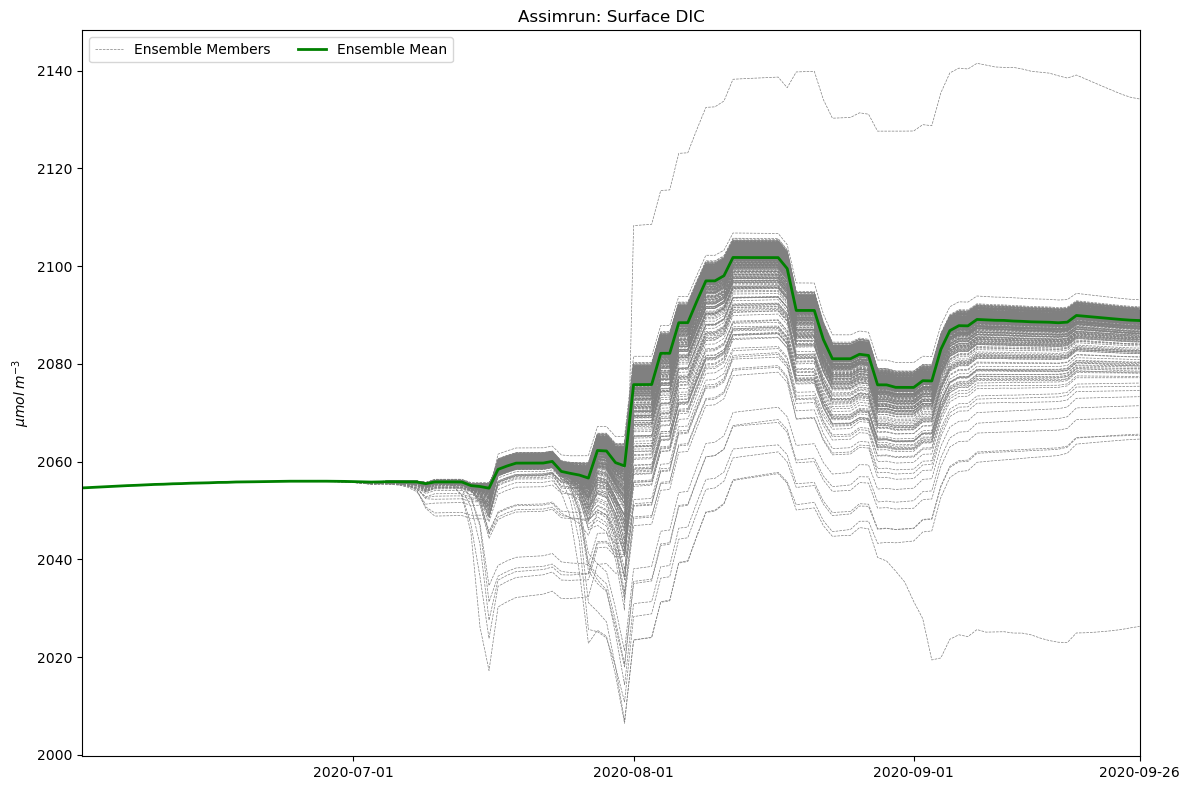

In [41]:
plt.figure(figsize=(12, 8))

# Plot each ensemble member
for i in range(freerun_DIC_data.shape[0]):
    plt.plot(mod_days, assimrun_DIC_data[i, 0, :], linestyle='--', linewidth=0.5, color='gray', label=f'Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = assimrun_DIC_ens_mean[0]
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylabel(r"$\mu mol\;m^{-3}$")
plt.legend(loc="upper left", ncol=2) 

plt.title("Assimrun: Surface DIC")
plt.tight_layout()
plt.show()

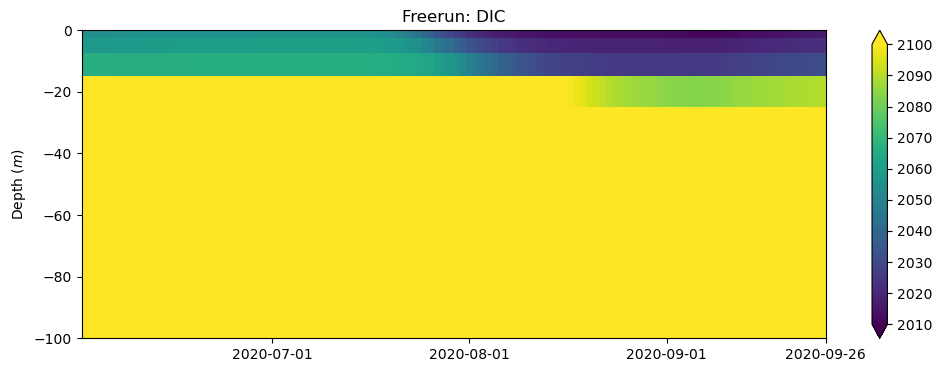

In [42]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], freerun_DIC_ens_mean, vmin=2010, vmax=2100) # 

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)
plt.ylim([-100,0])

plt.ylabel(r"Depth ($m$)")
plt.colorbar(img, extend='both')

plt.title("Freerun: DIC")
plt.show()

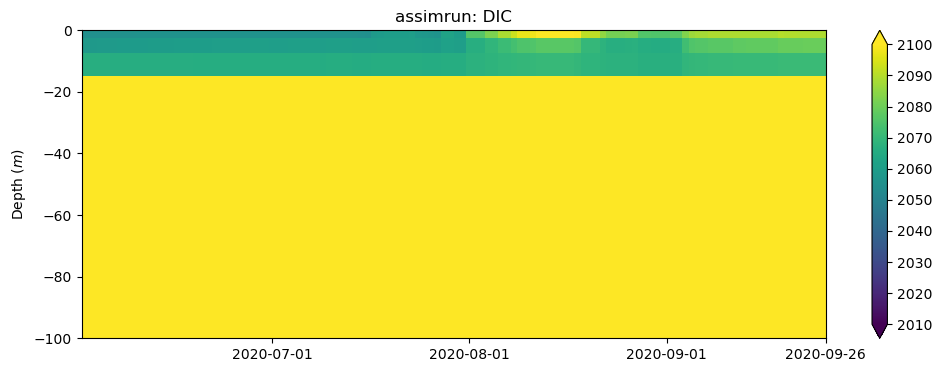

In [43]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], assimrun_DIC_ens_mean, vmin=2010, vmax=2100) # 

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)
plt.ylim([-100,0])

plt.ylabel(r"Depth ($m$)")
plt.colorbar(img, extend='both')

plt.title("assimrun: DIC")
plt.show()

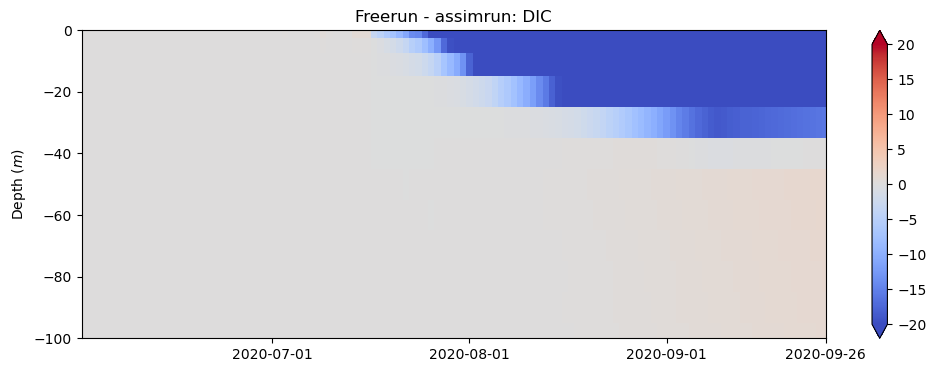

In [44]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], (freerun_DIC_ens_mean - assimrun_DIC_ens_mean), vmin=-20, vmax=20, cmap='coolwarm') # 

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)
plt.ylim([-100,0])

plt.ylabel(r"Depth ($m$)")
plt.colorbar(img, extend='both')

plt.title("Freerun - assimrun: DIC")
plt.show()

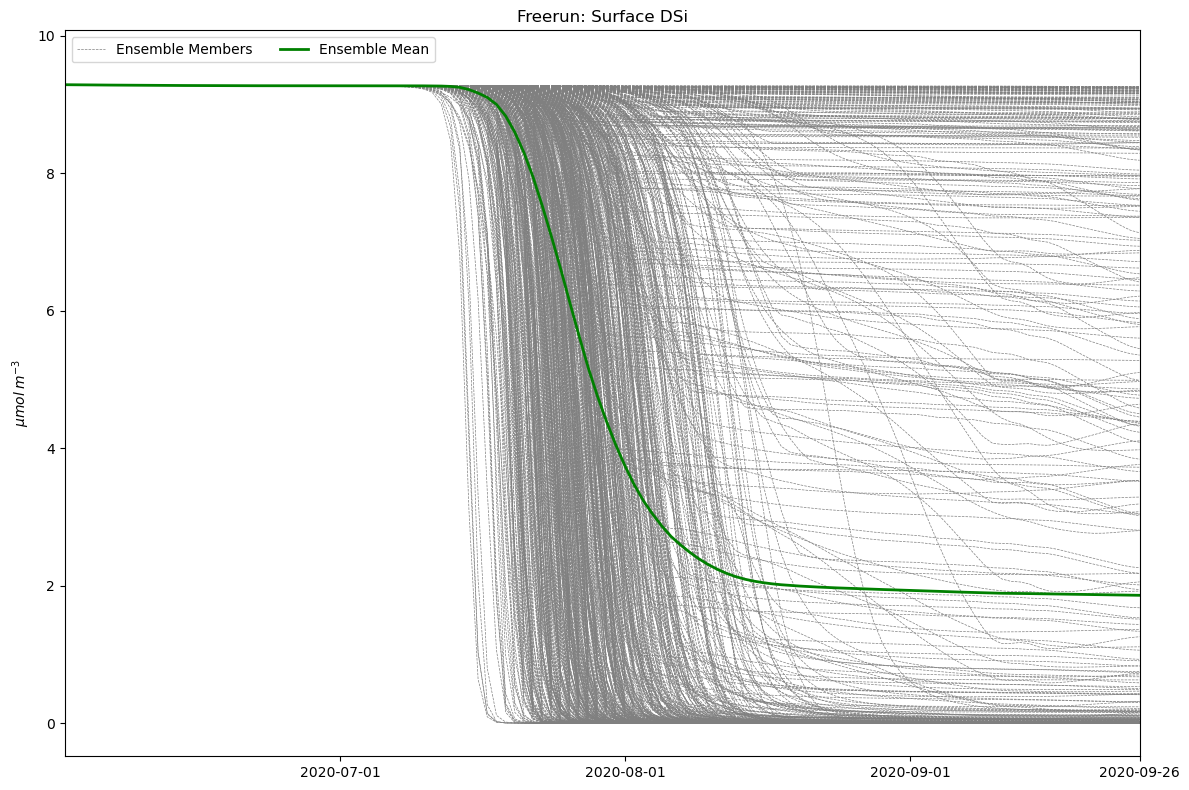

In [45]:
plt.figure(figsize=(12, 8))

# Plot each ensemble member
for i in range(freerun_DSi_data.shape[0]):
    plt.plot(mod_days, freerun_DSi_data[i, 0, :], linestyle='--', linewidth=0.5, color='gray', label=f'Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = freerun_DSi_ens_mean[0]
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylabel(r"$\mu mol\;m^{-3}$")
plt.legend(loc="upper left", ncol=2) 

plt.title("Freerun: Surface DSi")
plt.tight_layout()
plt.show()

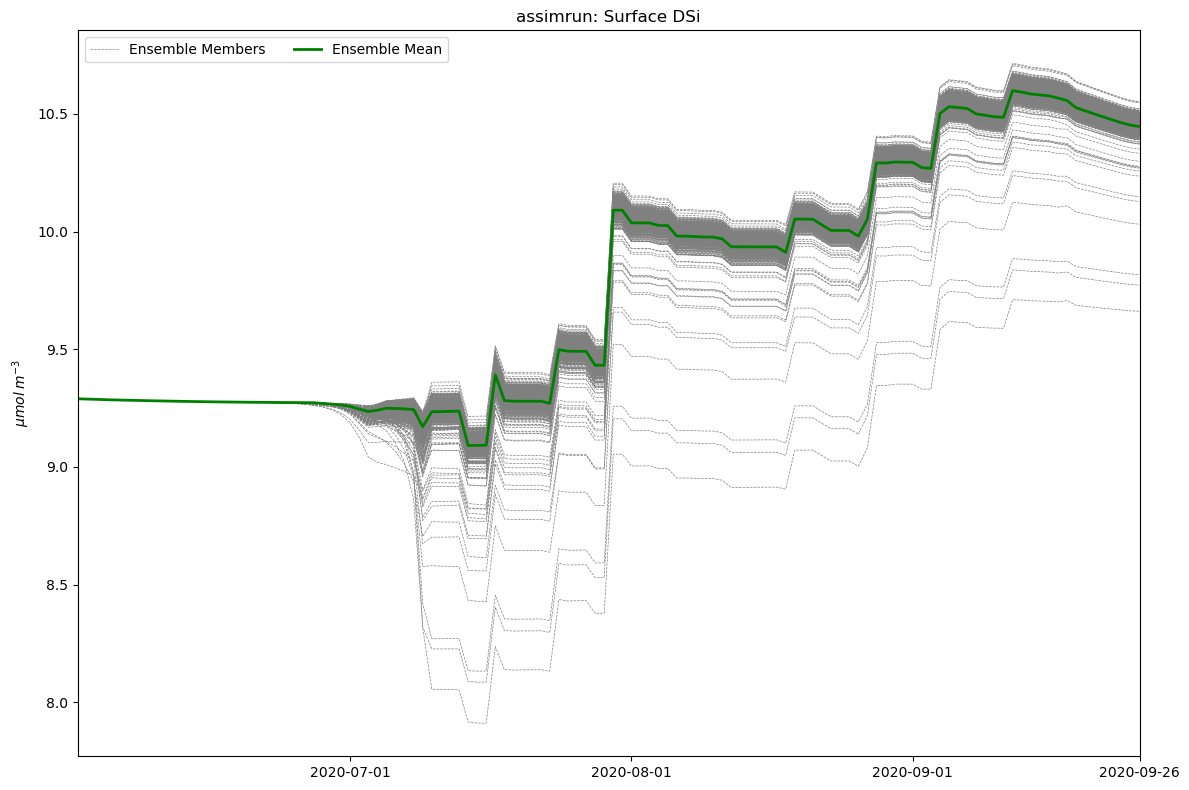

In [46]:
plt.figure(figsize=(12, 8))

# Plot each ensemble member
for i in range(assimrun_DSi_data.shape[0]):
    plt.plot(mod_days, assimrun_DSi_data[i, 0, :], linestyle='--', linewidth=0.5, color='gray', label=f'Ensemble Members' if i < 1 else None)

# Plot the mean
mean_values = assimrun_DSi_ens_mean[0]
plt.plot(mod_days, mean_values, color='green', linewidth=2, label='Ensemble Mean')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.ylabel(r"$\mu mol\;m^{-3}$")
plt.legend(loc="upper left", ncol=2) 

plt.title("assimrun: Surface DSi")
plt.tight_layout()
plt.show()

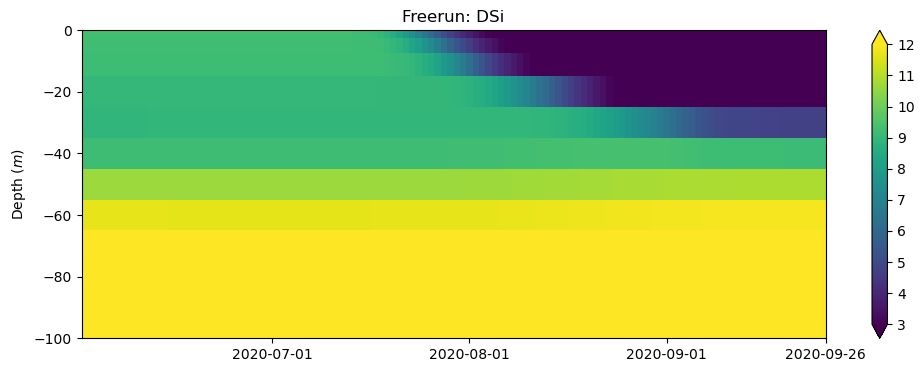

In [47]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], freerun_DSi_ens_mean, vmin=3, vmax=12) # 

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)
plt.ylim([-100,0])

plt.ylabel(r"Depth ($m$)")
plt.colorbar(img, extend='both')

plt.title("Freerun: DSi")
plt.show()

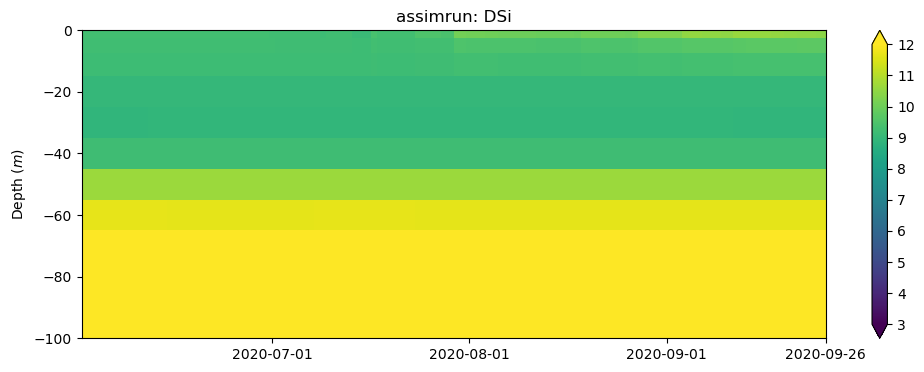

In [48]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], assimrun_DSi_ens_mean, vmin=3, vmax=12) # 

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)
plt.ylim([-100,0])

plt.ylabel(r"Depth ($m$)")
plt.colorbar(img, extend='both')

plt.title("assimrun: DSi")
plt.show()

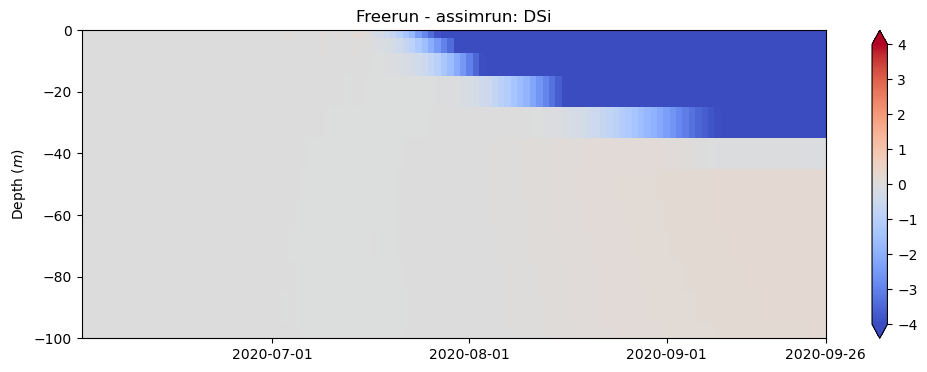

In [49]:
plt.rcParams["figure.figsize"] = (12,4) 

img = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], (freerun_DSi_ens_mean - assimrun_DSi_ens_mean), vmin=-4, vmax=4, cmap='coolwarm') # 

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)
plt.ylim([-100,0])

plt.ylabel(r"Depth ($m$)")
plt.colorbar(img, extend='both')

plt.title("Freerun - assimrun: DSi")
plt.show()

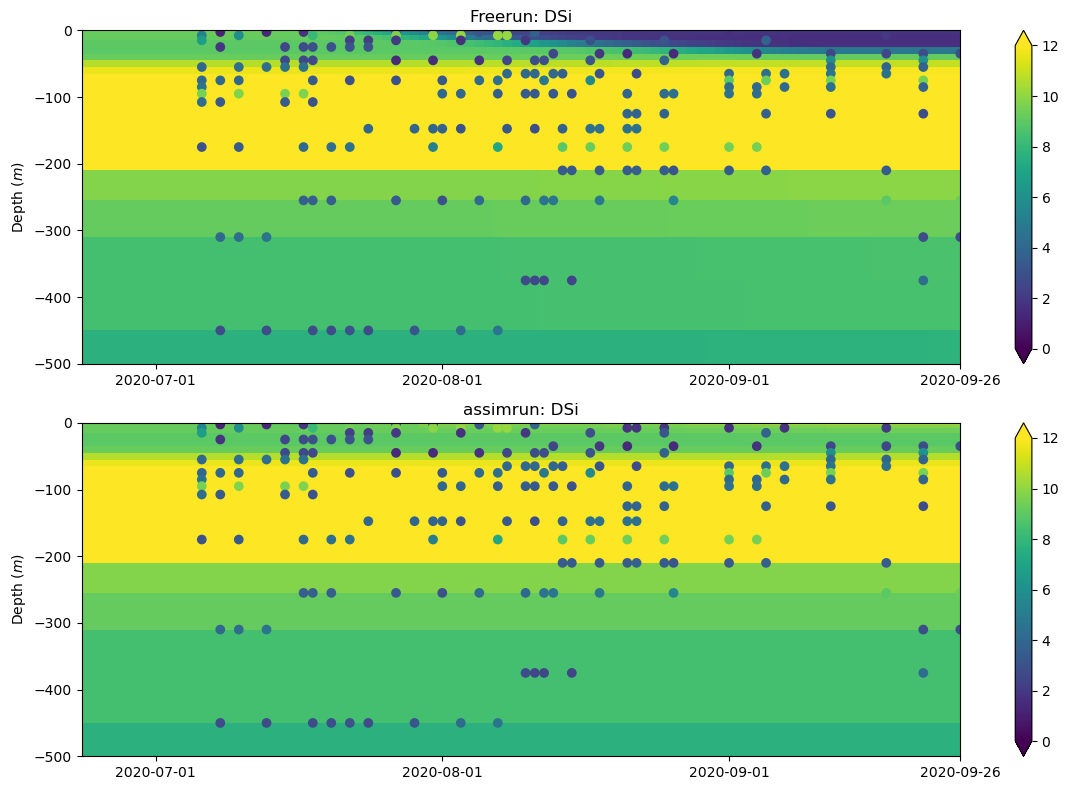

In [50]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
img1 = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], freerun_DSi_ens_mean, vmin=0, vmax=12) 
sc1 = plt.scatter(NUTRIENTS_day_flat, NUTRIENTS_depth_flat, c=dsi_obs_flat, cmap='viridis', marker='o')
plt.clim(0, 12)
plt.ylim([-500, 0])
plt.xlim([540, 635])
plt.xticks(xticks, xtickslabel)
plt.colorbar(img1, extend='both')
plt.ylabel(r"Depth ($m$)")
plt.title("Freerun: DSi")

plt.subplot(2, 1, 2)  
img2 = plt.pcolormesh(mod_days, mod_depths_bound[ :-1], assimrun_DSi_ens_mean, vmin=0, vmax=12)
sc2 = plt.scatter(NUTRIENTS_day_flat, NUTRIENTS_depth_flat, c=dsi_obs_flat, cmap='viridis', marker='o')
plt.clim(0, 12)
plt.ylim([-500, 0])
plt.xlim([540, 635])
plt.xticks(xticks, xtickslabel)
plt.colorbar(img2, extend='both')
plt.ylabel(r"Depth ($m$)")
plt.title("assimrun: DSi")

plt.tight_layout()
plt.show()

In [51]:
def read_param_value(param, dir="/albedo/work/user/nmamnun/nuarctic/REcoM1D/assimrun", return_time_steps=False):
    """
    Reads and processes a specified parameter from a file in a given directory.
    
    Parameters:
    - param: The name of the parameter to read (e.g., 'alfa').
    - dir: The directory where the parameter file is located. Default is set to a specific directory.
    - return_time_steps: Boolean indicating whether to return time steps along with parameter values. Default is True.
    
    Returns:
    - If return_time_steps is True: A tuple of numpy arrays: (time_steps_array, param_values_array)
    - If return_time_steps is False: A numpy array of parameter values
    """
    file_path = f"{dir}/{param}.dat"
    
    # Initialize lists to hold time steps and parameter values
    time_steps = []
    param_values = []

    # Open and read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()  # Read all lines at once

    # Process the first line
    parts = lines[0].split('=')
    time_step = int(parts[0].split()[-1])  # Corrected index for extracting time step
    param_value = float(parts[1].strip())  # Extracting parameter value
    time_steps.append(time_step)
    param_values.append(param_value)

    # Process lines containing "<param>  ana" (assuming the parameter name is directly used in the file)
    for line in lines[1:]:  # Skip the first line since it's already processed
        if f"{param}  ana" in line:
            parts = line.split('=')
            time_step = int(parts[0].split()[-1])  # Corrected index for extracting time step
            param_value = float(parts[1].strip())  # Extracting parameter value
            time_steps.append(time_step)
            param_values.append(param_value)

    # Convert lists to numpy arrays
    time_steps_array = np.array(time_steps)
    time_steps_array[0] = time_steps_array[1] - 96
    param_values_array = np.array(param_values)

    # Return based on return_time_steps flag
    if return_time_steps:
        return time_steps_array, param_values_array
    else:
        return param_values_array

In [52]:
# Calling the function with return_time_steps=True 
time_steps, alfa_values = read_param_value('alfa', return_time_steps=True)

# Example usage of the returned data
print("Time Steps:", time_steps)
print("Alfa Values:", alfa_values)

Time Steps: [15768 15864 15960 16056 16440 16680 17064 17112 17304 17688 17976 18312
 18648 19080 19560 19848 20184 20520 20568 20856 21096 21288 21384 21432
 21528 21624 21672 21720 21864 21960 22008 22056 22104 22200 22296 22344
 22392 22536 22632 22728 22776 22872 22968 23064 23112 23208 23256 23304
 23352 23400 23448 23544 23592 23736 23784 23928 23976 24024 24120 24264
 24360 24408 24456 24552 24744 24792 25032 25080 25272 25416]
Alfa Values: [0.13951841 0.13951841 0.13951841 0.13951841 0.13951841 0.13951841
 0.13951841 0.13951841 0.13951841 0.13951841 0.13952017 0.13952017
 0.13952014 0.13952014 0.13952016 0.13952027 0.13952041 0.13952032
 0.1707003  0.17070014 0.18141843 0.17835131 0.17246706 0.17598828
 0.17599802 0.17697183 0.19063887 0.19064499 0.190654   0.1905949
 0.22543734 0.22189785 0.22111911 0.22106485 0.22076755 0.25065639
 0.25089352 0.26191761 0.24386395 0.26436383 0.26436472 0.27128092
 0.27943104 0.28440669 0.28913604 0.29002984 0.29507089 0.29506794
 0.29508833 0

In [53]:
# Calling the function with return_time_steps=False
alfa_values = read_param_value('alfa', return_time_steps=False)

# Example usage of the returned data
print("Alfa Values:", alfa_values)

Alfa Values: [0.13951841 0.13951841 0.13951841 0.13951841 0.13951841 0.13951841
 0.13951841 0.13951841 0.13951841 0.13951841 0.13952017 0.13952017
 0.13952014 0.13952014 0.13952016 0.13952027 0.13952041 0.13952032
 0.1707003  0.17070014 0.18141843 0.17835131 0.17246706 0.17598828
 0.17599802 0.17697183 0.19063887 0.19064499 0.190654   0.1905949
 0.22543734 0.22189785 0.22111911 0.22106485 0.22076755 0.25065639
 0.25089352 0.26191761 0.24386395 0.26436383 0.26436472 0.27128092
 0.27943104 0.28440669 0.28913604 0.29002984 0.29507089 0.29506794
 0.29508833 0.2950844  0.29508134 0.33215346 0.33309583 0.32466689
 0.31896604 0.31974861 0.3229169  0.37691391 0.37829231 0.38023089
 0.42912398 0.44662482 0.44760524 0.44934248 0.47784656 0.47782209
 0.46956272 0.47163522 0.47161084 0.49575585]


In [54]:
# def date_to_step(date, reference_date=np.datetime64('2019-04-15')):
#     date = np.datetime64(date)
#     reference_date = np.datetime64(reference_date)
#     days_difference = (date - reference_date).astype('timedelta64[D]').item().days
#     time_step = days_difference * 48
#     return time_step

In [55]:
# def step_to_date(time_step, reference_date=np.datetime64('2019-04-15')):
#     # Convert the time_step back to days difference by dividing by 48
#     days_difference = time_step // 48
    
#     # Calculate the date by adding the days difference to the reference date
#     date = reference_date + np.timedelta64(days_difference, 'D')
    
#     return date

In [56]:
# for time_step in time_steps_array:
#     print(f'Time Step {time_step} = {step_to_date(time_step)}')

In [57]:
# Convert a day to date 

from datetime import datetime, timedelta

def step_to_date(time_step):
    """
    Convert a time step to date.
    
    Args:
    time_step (int): The time step.
    
    Returns:
    str: Date in 'YYYY-MM-DD' format.
    """
    day_number = int(time_step//48 + 105)
    
    return day_to_date(day_number)

In [58]:
# for time_step in time_steps_array:
#     print(f'Time Step {time_step} = {step_to_date(time_step)}')

In [59]:
def step_to_day(time_step):
    day_number = int(time_step//48 + 105)
    return day_number

In [60]:
vectorized_step_to_day = np.vectorize(step_to_day)

In [61]:
def read_ense_param(param, dir="/albedo/work/user/nmamnun/nuarctic/REcoM1D/assimrun", dim_ens=750):
    """
    Reads ensemble parameter values from multiple files and returns them as a 2D NumPy array.
    
    Parameters:
    - param: The name of the parameter to read (e.g., 'alfa').
    - dir: The directory where the parameter files are located. Default is set to a specific directory.
    - dim_ens: The size of the ensemble, i.e., the number of files to read.
    
    Returns:
    A 2D NumPy array where each row represents the parameter values from one ensemble member.
    """
    param_values_ens = []
    for i in range(1, dim_ens + 1):
        file_name = f'{dir}/{param}_{i}.dat'
        
        with open(file_name, 'r') as file:
            lines = file.readlines()
            
            # Initialize a list for this file's parameter values
        file_param_values = []
        
        for line in lines:
            parts = line.split('=')
            param_value = float(parts[1].strip())  # Extracting parameter value
            file_param_values.append(param_value)
            
        # Append the current file's parameter values to the main list
        param_values_ens.append(file_param_values)
        
    # Convert the list of lists to a 2D NumPy array
    param_values_ens_array = np.array(param_values_ens)
    
    return param_values_ens_array

In [62]:
alfa = read_param_value('alfa', return_time_steps=False)
alfa_ens = read_ense_param("alfa")

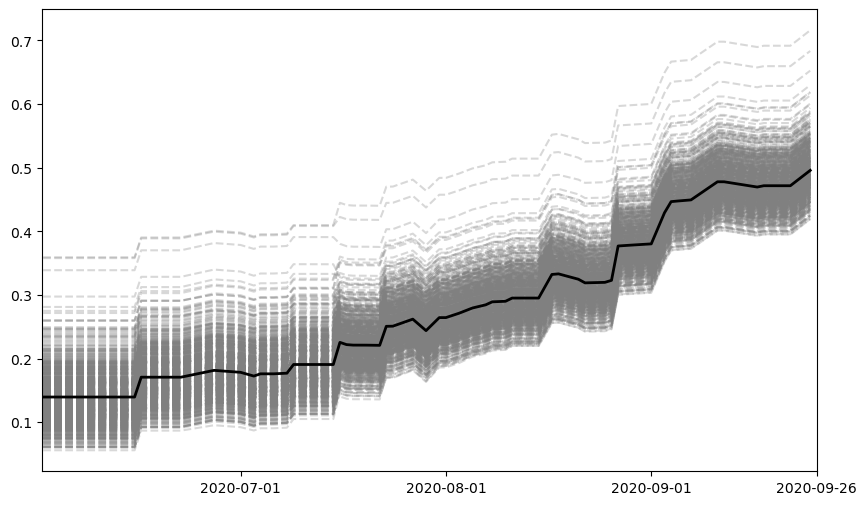

In [63]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(alfa_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), alfa_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main alfa_values_array
plt.plot(vectorized_step_to_day(time_steps), alfa, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

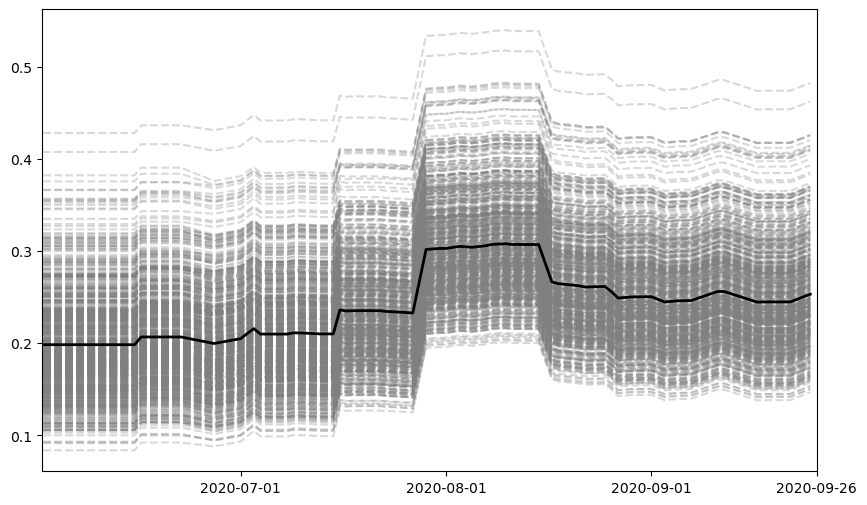

In [64]:
NCuptakeRatio = read_param_value('NCuptakeRatio', return_time_steps=False)
NCuptakeRatio_ens = read_ense_param("NCuptakeRatio")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(NCuptakeRatio_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), NCuptakeRatio_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main alfa_values_array
plt.plot(vectorized_step_to_day(time_steps), NCuptakeRatio, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

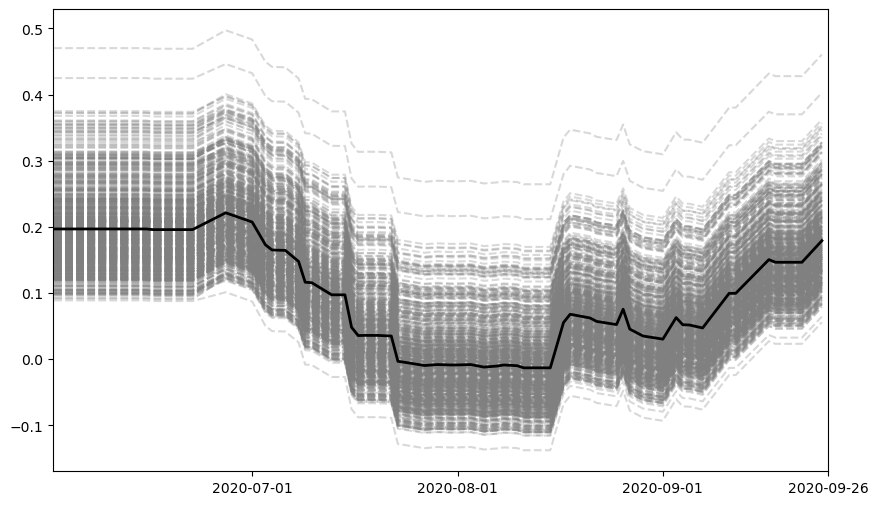

In [65]:
NCUptakeRatio_d = read_param_value('NCUptakeRatio_d', return_time_steps=False)
NCUptakeRatio_d_ens = read_ense_param("NCUptakeRatio_d")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(NCUptakeRatio_d_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), NCUptakeRatio_d_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main alfa_values_array
plt.plot(vectorized_step_to_day(time_steps), NCUptakeRatio_d, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

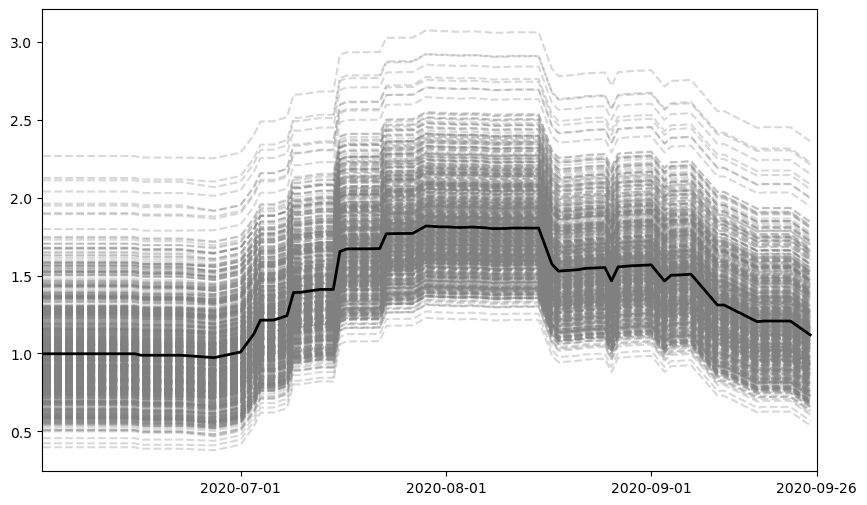

In [66]:
k_din_d = read_param_value('k_din_d', return_time_steps=False)
k_din_d_ens = read_ense_param("k_din_d")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(k_din_d_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), k_din_d_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main alfa_values_array
plt.plot(vectorized_step_to_day(time_steps), k_din_d, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

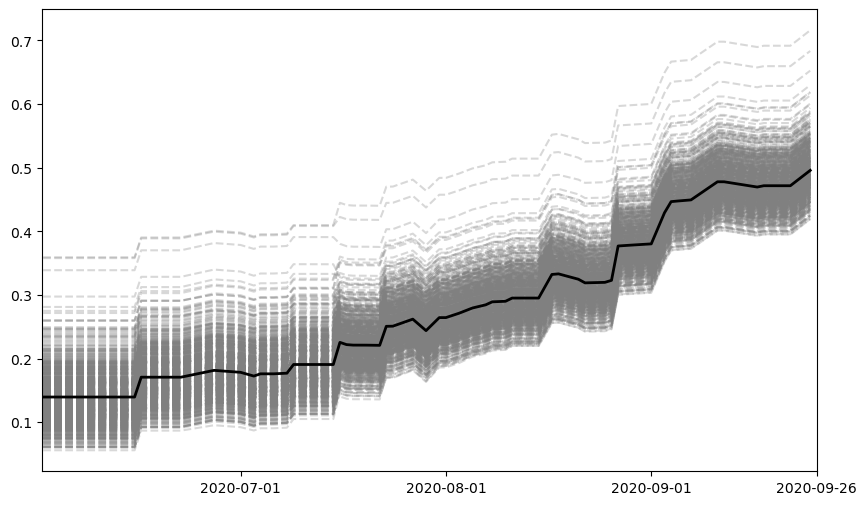

In [67]:
alfa = read_param_value('alfa', return_time_steps=False)
alfa_ens = read_ense_param("alfa")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(alfa_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), alfa_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main alfa_values_array
plt.plot(vectorized_step_to_day(time_steps), alfa, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

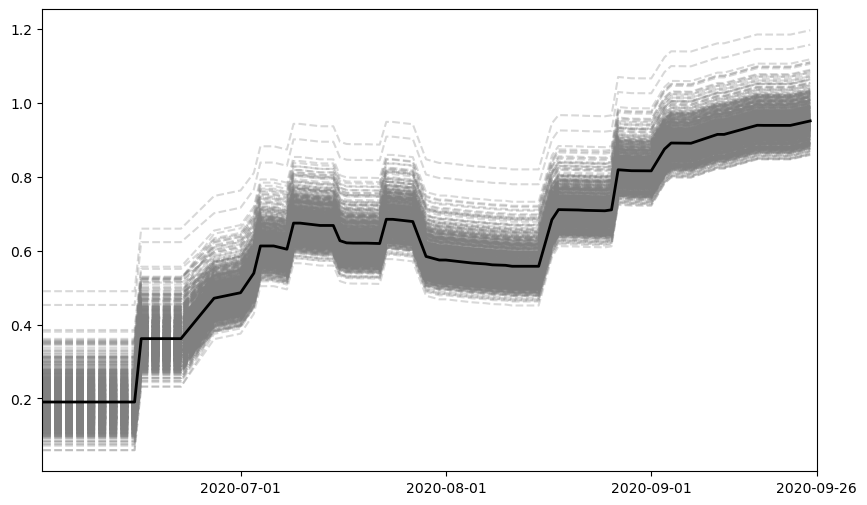

In [68]:
alfa_d = read_param_value('alfa_d', return_time_steps=False)
alfa_d_ens = read_ense_param("alfa_d")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(alfa_d_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), alfa_d_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main alfa_d_values_array
plt.plot(vectorized_step_to_day(time_steps), alfa_d, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

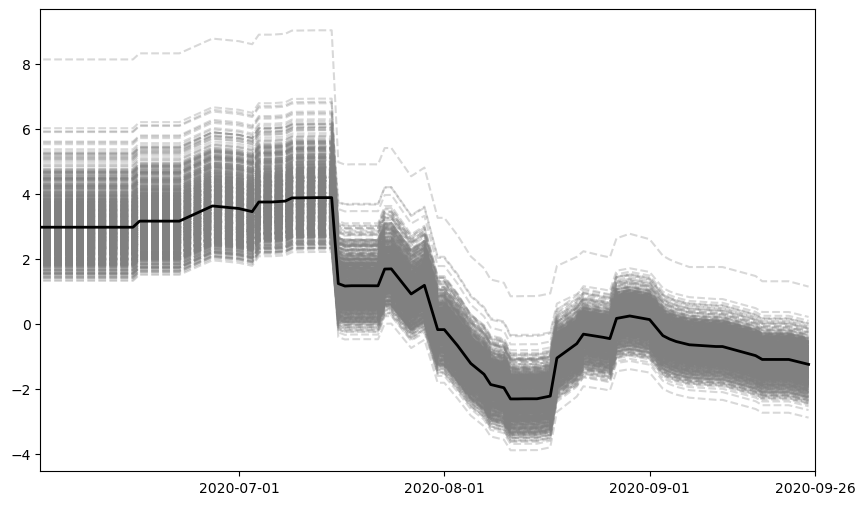

In [69]:
P_cm = read_param_value('P_cm', return_time_steps=False)
P_cm_ens = read_ense_param("P_cm")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(P_cm_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), P_cm_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main P_cm_values_array
plt.plot(vectorized_step_to_day(time_steps), P_cm, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

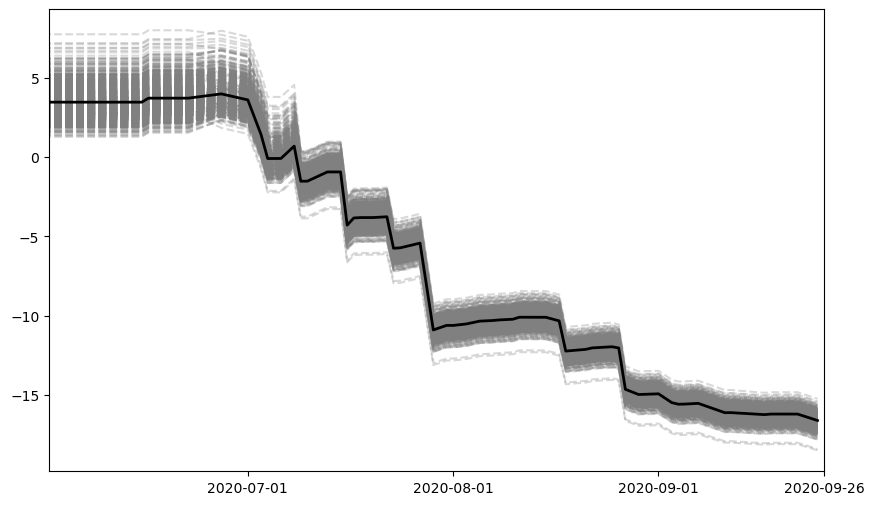

In [70]:
P_cm_d = read_param_value('P_cm_d', return_time_steps=False)
P_cm_d_ens = read_ense_param("P_cm_d")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(P_cm_d_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), P_cm_d_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main P_cm_d_values_array
plt.plot(vectorized_step_to_day(time_steps), P_cm_d, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

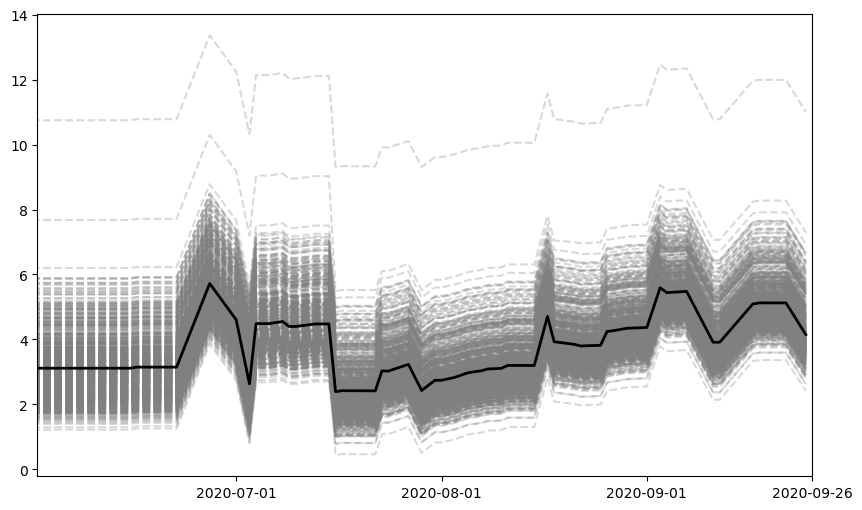

In [71]:
Chl2N_max = read_param_value('Chl2N_max', return_time_steps=False)
Chl2N_max_ens = read_ense_param("Chl2N_max")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(Chl2N_max_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), Chl2N_max_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main Chl2N_max_values_array
plt.plot(vectorized_step_to_day(time_steps), Chl2N_max, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

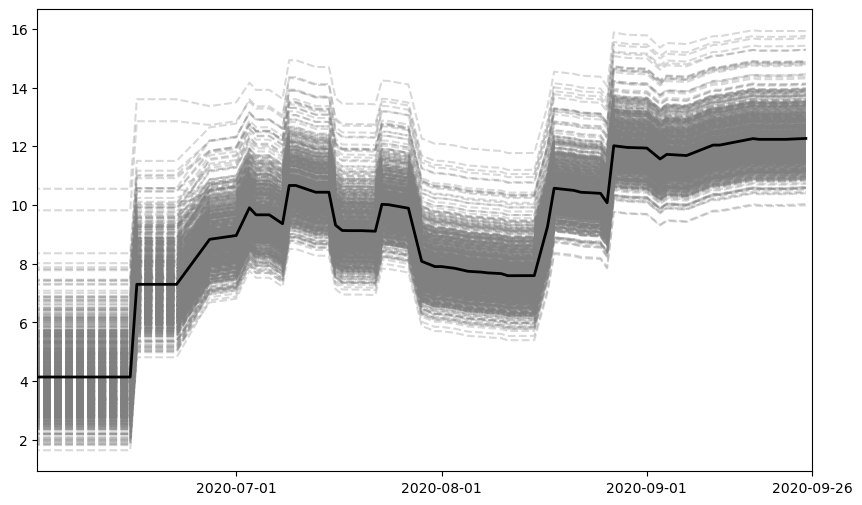

In [72]:
Chl2N_max_d = read_param_value('Chl2N_max_d', return_time_steps=False)
Chl2N_max_d_ens = read_ense_param("Chl2N_max_d")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(Chl2N_max_d_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), Chl2N_max_d_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main Chl2N_max_d_values_array
plt.plot(vectorized_step_to_day(time_steps), Chl2N_max_d, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

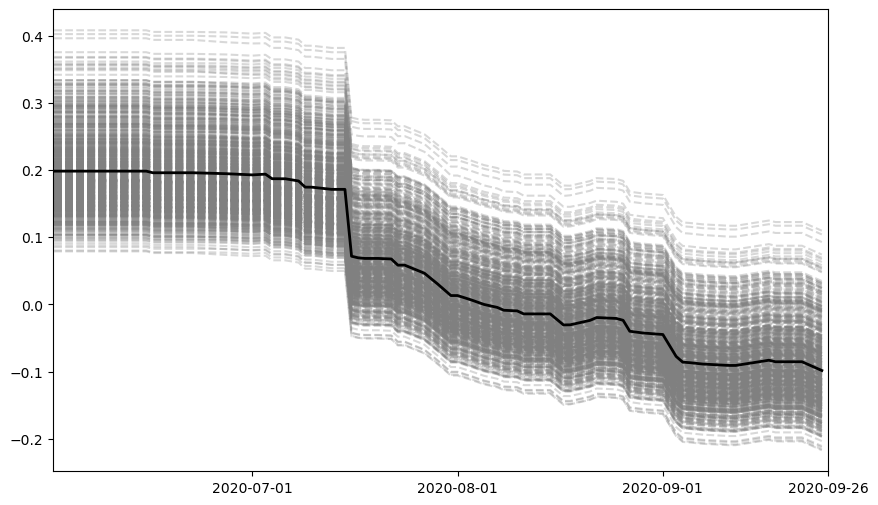

In [73]:
deg_Chl = read_param_value('deg_Chl', return_time_steps=False)
deg_Chl_ens = read_ense_param("deg_Chl")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(deg_Chl_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), deg_Chl_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main deg_Chl_values_array
plt.plot(vectorized_step_to_day(time_steps), deg_Chl, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

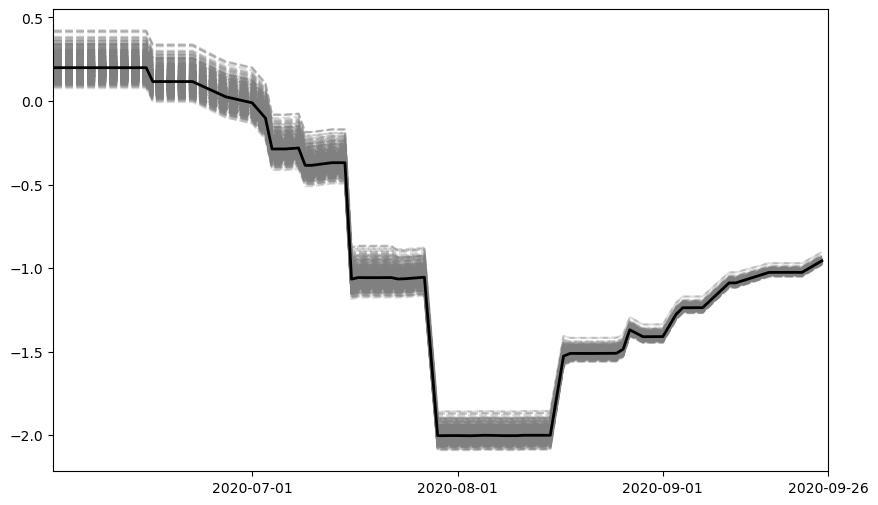

In [74]:
deg_Chl_d = read_param_value('deg_Chl_d', return_time_steps=False)
deg_Chl_d_ens = read_ense_param("deg_Chl_d")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(deg_Chl_d_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), deg_Chl_d_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main deg_Chl_d_values_array
plt.plot(vectorized_step_to_day(time_steps), deg_Chl_d, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

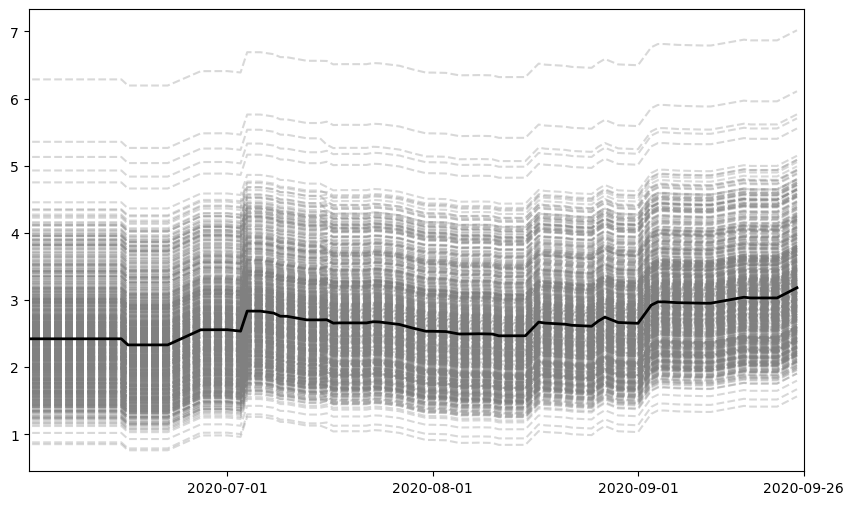

In [75]:
graz_max = read_param_value('graz_max', return_time_steps=False)
graz_max_ens = read_ense_param("graz_max")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(graz_max_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), graz_max_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main graz_max_values_array
plt.plot(vectorized_step_to_day(time_steps), graz_max, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

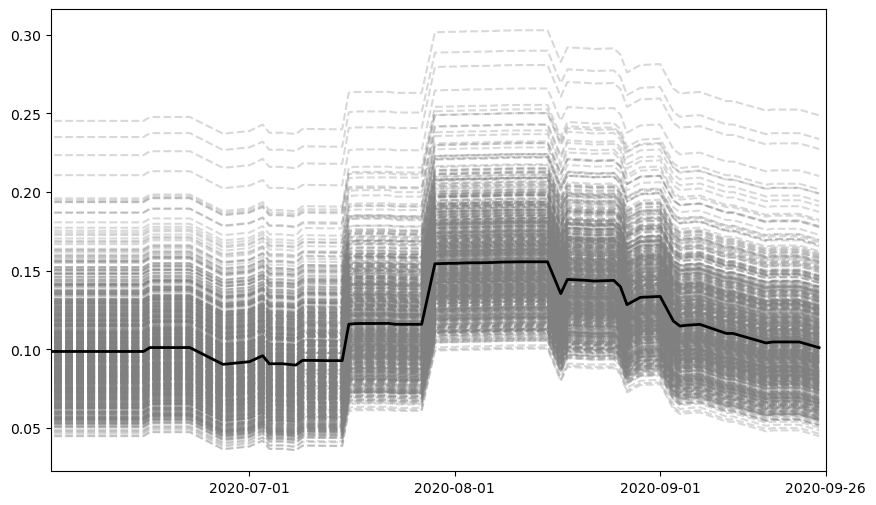

In [76]:
graz_max2 = read_param_value('graz_max2', return_time_steps=False)
graz_max2_ens = read_ense_param("graz_max2")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(graz_max2_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), graz_max2_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main graz_max2_values_array
plt.plot(vectorized_step_to_day(time_steps), graz_max2, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

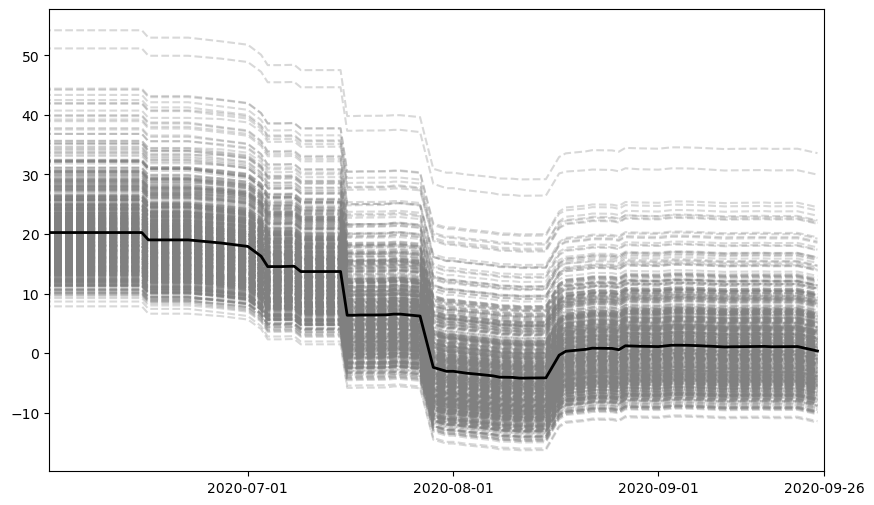

In [77]:
VDet = read_param_value('VDet', return_time_steps=False)
VDet_ens = read_ense_param("VDet")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(VDet_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), VDet_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main VDet_values_array
plt.plot(vectorized_step_to_day(time_steps), VDet, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()

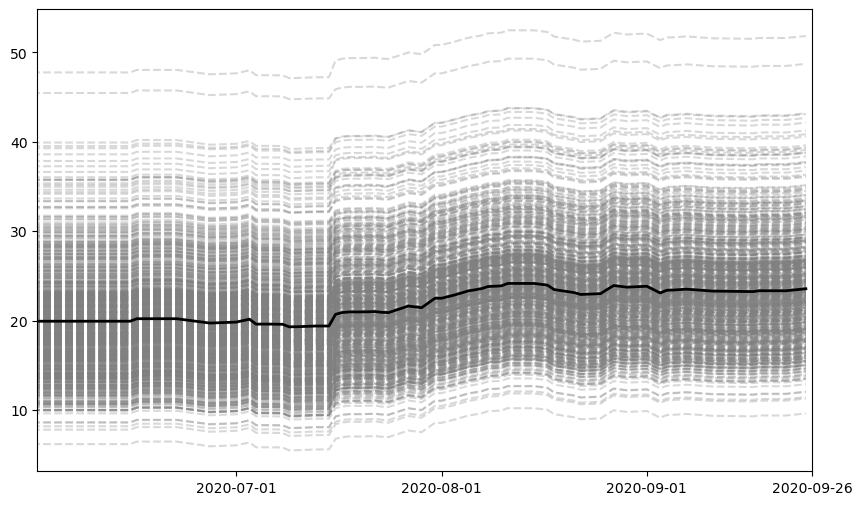

In [78]:
VDet_zoo2 = read_param_value('VDet_zoo2', return_time_steps=False)
VDet_zoo2_ens = read_ense_param("VDet_zoo2")

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ensemble member
for i in range(VDet_zoo2_ens.shape[0]):  
    plt.plot(vectorized_step_to_day(time_steps), VDet_zoo2_ens[i, :], linestyle='--', color='grey', alpha=0.3)

# Plot the main VDet_zoo2_values_array
plt.plot(vectorized_step_to_day(time_steps), VDet_zoo2, linestyle='-', linewidth=2, color='k')

plt.xlim([518,635])
plt.xticks(xticks, xtickslabel)

plt.show()